# TDI Challenge 3

In [194]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1)

from datetime import datetime

import csv

from matplotlib import rcParams

from scipy.stats import chi2_contingency
import statsmodels.api as sm 

import math
from difflib import SequenceMatcher
from ipywidgets import interact, interactive, fixed, interact_manual
from textwrap import wrap

import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

## Section 3

Propose a project to do while at The Data Incubator. We want to know about **your ability to think at a high level**. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

*Facebook* Project suggestions:
+ Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.
+ Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.
+ Facebook followers and which companies are the most successful at growing social media traction.

## data exploration: Facebook

In [3]:
facebook = pd.read_csv('temp_datalab_records_social_facebook.csv')

/Users/abbypro/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
facebook.head()

dataset_id                    time              username  checkins  \
0       53088  2015-01-01 05:00:00+00            SodaStream         0   
1       52642  2015-01-01 05:00:00+00              ANSYSInc       148   
2       53656  2015-01-01 05:00:00+00         MyAquaAmerica         0   
3       53033  2015-01-01 05:00:00+00              Qualcomm       173   
4       52783  2015-01-01 05:00:00+00  eaglepharmaceuticals         0   

  has_added_app  were_here_count    likes  talking_about_count  \
0             f                0   761533                  587   
1             f                0    43442                 1305   
2             f                0     5591                  297   
3             f                0  1232521                 2685   
4             f                0       18                    0   

        facebook_id date_added                   date_updated  entity_id  \
0       54885616308        NaN  2017-02-14 03:35:13.236826+00        NaN   
1   160242297413411        NaN   2017-02-14 01:55:52.78506+00        NaN   
2   591693544195818        NaN  2017-02-14 08:13:51.267343+00        NaN   
3      108472637291        NaN  2017-02-14 03:24:04.363035+00        NaN   
4  1428265940729350        NaN  2017-02-14 02:22:10.193588+00        NaN   

   cusip  isin  
0    NaN   NaN  
1    NaN   NaN  
2    NaN   NaN  
3    NaN   NaN  
4    NaN   NaN

In [5]:
facebook.dtypes

dataset_id               int64
time                    object
username                object
checkins                 int64
has_added_app           object
were_here_count          int64
likes                    int64
talking_about_count      int64
facebook_id              int64
date_added              object
date_updated            object
entity_id              float64
cusip                  float64
isin                   float64
dtype: object

In [6]:
'Number of Records: {:,}'.format(facebook.shape[0])

'Number of Records: 3,621,391'

In [9]:
'Number of Unique Business: {:,}'.format(len(facebook['username'].unique()))

'Number of Unique Business: 4,951'

In [10]:
facebook['time_2'] = pd.to_datetime(facebook['time'])
facebook['date_updated_2'] = pd.to_datetime(facebook['date_updated'])

----

In [43]:
useful_cols = ['dataset_id','facebook_id', 'username', 
               'checkins', 'were_here_count', 'likes', 'talking_about_count', 
               'time_2','date_updated_2']

In [44]:
num_cols = ['checkins', 'were_here_count', 'likes', 'talking_about_count']

In [45]:
num_cols

['checkins', 'were_here_count', 'likes', 'talking_about_count']

-----

### Match Industry Information

In [13]:
cusip = pd.read_csv('cusip.csv')

In [14]:
cusip.head()

gvkey                     conm    tic      cusip       cik   sic     naics  \
0   1000    A & E PLASTIK PAK INC   AE.2  000032102       NaN  3089       NaN   
1   1001  A & M FOOD SERVICES INC  AMFD.  000165100  723576.0  5812     722.0   
2   1002                 AAI CORP   AAIC  000352104    1745.0  3825       NaN   
3   1003    A.A. IMPORTING CO INC   ANTQ  000354100  730052.0  5712  442110.0   
4   1004                 AAR CORP    AIR  000361105    1750.0  5080  423860.0   

   year1  year2  
0   1961   1977  
1   1978   1985  
2   1960   1972  
3   1980   1989  
4   1965   2016

In [15]:
cusip.shape

(38089, 9)

In [16]:
user_list = facebook['username'].value_counts().index.tolist()

In [17]:
user_list = [u.upper() for u in user_list]

Source of SIC:
https://www.sec.gov/info/edgar/siccodes.htm

In [18]:
sic = pd.read_csv('sic.csv')

In [19]:
df_match2 = pd.DataFrame()
for u in user_list:
    good = cusip['conm'].str.contains(u)
    temp = cusip[good][['conm','gvkey','cusip','sic']]
    temp['user'] = u

    df_match2 = df_match2.append(temp, ignore_index = True) 

In [20]:
df_match2.shape

(12767, 5)

In [21]:
#df_match2['user'].value_counts()

In [22]:
df_match2.head()

conm   gvkey      cusip   sic  user
0  MULTIVOX CORP OF AMERICA    7611  625469101  3651  TIVO
1     TIVOLI INDUSTRIES INC   30684  888711306  3640  TIVO
2        TIVOLI SYSTEMS INC   31603  888722105  7372  TIVO
3                 TIVO CORP   64480  88870P106  6794  TIVO
4                  TIVO INC  124394  888706108  4841  TIVO

In [23]:
#Create a new column 'diff' and get the result of comparision to it
df_match2['diff'] = df_match2[['conm','user']].apply(lambda x: SequenceMatcher(None, x[0].strip(), x[1].strip()).ratio(), axis=1) 

In [24]:
df_match_good = df_match2.sort_values('diff', ascending=False).drop_duplicates(['user'])

In [25]:
df_match_good.shape

(628, 6)

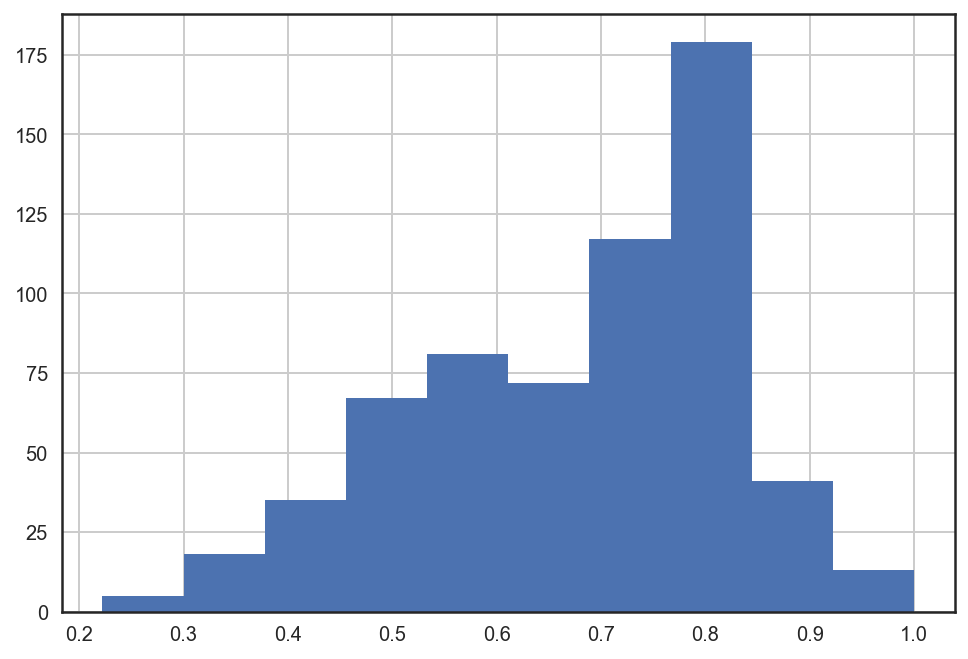

In [26]:
df_match_good['diff'].hist()

In [27]:
#len(df_match_good['user'].value_counts())

In [28]:
df_match_good = df_match_good.merge(sic)

In [29]:
df_match_good.columns

Index(['conm', 'gvkey', 'cusip', 'sic', 'user', 'diff', 'a/d_office',
       'industry'],
      dtype='object')

In [30]:
facebook[useful_cols].dtypes

dataset_id                      int64
facebook_id                     int64
username                       object
checkins                        int64
were_here_count                 int64
likes                           int64
talking_about_count             int64
time_2                 datetime64[ns]
date_updated_2         datetime64[ns]
dtype: object

In [31]:
facebook2 = facebook.copy()
facebook2['user'] = facebook2['username'].str.upper()
facebook2 = facebook2[useful_cols+['user']].merge(df_match_good, how = 'left')

In [32]:
facebook2.shape[0] == facebook.shape[0]

True

In [33]:
facebook2.columns

Index(['dataset_id', 'facebook_id', 'username', 'checkins', 'were_here_count',
       'likes', 'talking_about_count', 'time_2', 'date_updated_2', 'user',
       'conm', 'gvkey', 'cusip', 'sic', 'diff', 'a/d_office', 'industry'],
      dtype='object')

In [34]:
sic_2 = pd.read_csv('sic_2_digit_codes.csv')
sic_2.columns = ['sic_2digit','industry_short']

In [35]:
facebook2['sic_2digit'] = facebook2['sic'] // 100
facebook2['sic_2digit'] = facebook2['sic_2digit'].fillna(0)
facebook2['sic_2digit'] = facebook2['sic_2digit'].astype('int')
facebook3 = facebook2.merge(sic_2, how = 'left')
#len(facebook2['industry'].value_counts())

In [36]:
facebook3['industry_short'] = facebook3['industry_short'].fillna('Not Available')

In [37]:
facebook3.columns

Index(['dataset_id', 'facebook_id', 'username', 'checkins', 'were_here_count',
       'likes', 'talking_about_count', 'time_2', 'date_updated_2', 'user',
       'conm', 'gvkey', 'cusip', 'sic', 'diff', 'a/d_office', 'industry',
       'sic_2digit', 'industry_short'],
      dtype='object')

In [38]:
#facebook3['industry_short'].value_counts()

In [44]:
#facebook3.to_csv('facebook3.csv',index=False)

In [2]:
#facebook3 = pd.read_csv('facebook3.csv')

In [7]:
#facebook3.drop(['Unnamed: 0'], axis=1, inplace = True)

In [10]:
#facebook3.dtypes

dataset_id                      int64
facebook_id                     int64
username                       object
checkins                        int64
were_here_count                 int64
likes                           int64
talking_about_count             int64
time_2                 datetime64[ns]
date_updated_2         datetime64[ns]
user                           object
conm                           object
gvkey                         float64
cusip                          object
sic                           float64
diff                          float64
a/d_office                     object
industry                       object
sic_2digit                      int64
industry_short                 object
dtype: object

In [11]:
#facebook3['time_2'] = pd.to_datetime(facebook3['time_2'])
#facebook3['date_updated_2'] = pd.to_datetime(facebook3['date_updated_2'])

-----

#### Industry Baseline

In [12]:
industry_list = facebook3['industry_short'].value_counts().index.tolist()

In [14]:
#industry_list

In [15]:
def get_time_period(df, p):
    if p == 'D':
        df['time_period'] = df['time_2'].dt.date
    else:    
        df['time_period'] = df['time_2'].dt.to_period(p)
    
    return df

In [16]:
def industry_baseline(data, industry, col, p):
    
    if industry == 'Not Available':
        return None
    
    good = data['industry_short'] == industry
    df_ind = data[good]
    
    df_ind = get_time_period(df_ind,p)
    
    # calculate the grand mean
    df0 = df_ind.groupby(['time_period','user'])[col].mean()
    df = df0.reset_index().groupby(['time_period'])[col].agg({'mean','median','max','min','std','count'}).reset_index()

    del data
    return df,df0

In [17]:
def company_trend(data, company, col, p):
    
    good = data['user'] == company
    df = data[good]
    
    industry = df['industry_short'].values[0]
    
    df = get_time_period(df, p)
    
    grouped = df.sort_values('time_period').groupby(['time_period'])
    
    df_byperiod = grouped[col].agg({'mean'}).reset_index()
    
    df_byperiod[col+'_inc'] = df_byperiod['mean'].pct_change()
    df_byperiod = df_byperiod.rename(columns = {'mean': 'avg'})
    
    return df_byperiod, industry

In [18]:
data = facebook3
company = 'WALGREENS'
col = 'talking_about_count'
p = 'W'
test, industry = company_trend(data, company, col, p)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
industry

'Miscellaneous Retail'

In [20]:
#test

In [21]:
test.shape

(180, 3)

In [22]:
test.head()

time_period           avg  talking_about_count_inc
0 2015-01-12/2015-01-18   3369.142857                      NaN
1 2015-01-19/2015-01-25   3946.142857                 0.171260
2 2015-01-26/2015-02-01   4284.428571                 0.085726
3 2015-02-02/2015-02-08   9231.571429                 1.154680
4 2015-02-09/2015-02-15  12027.857143                 0.302905

In [23]:
#i = 1
#ind = industry_list[i]
#col = num_cols[i]
#p = 'W'
df,df0 = industry_baseline(data,industry,col,p)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
#df0

In [25]:
test['t'] = test.index
df_plot = test.merge(df,how = 'left',on='time_period')

In [26]:
df_plot.shape

(180, 10)

In [27]:
#df_plot

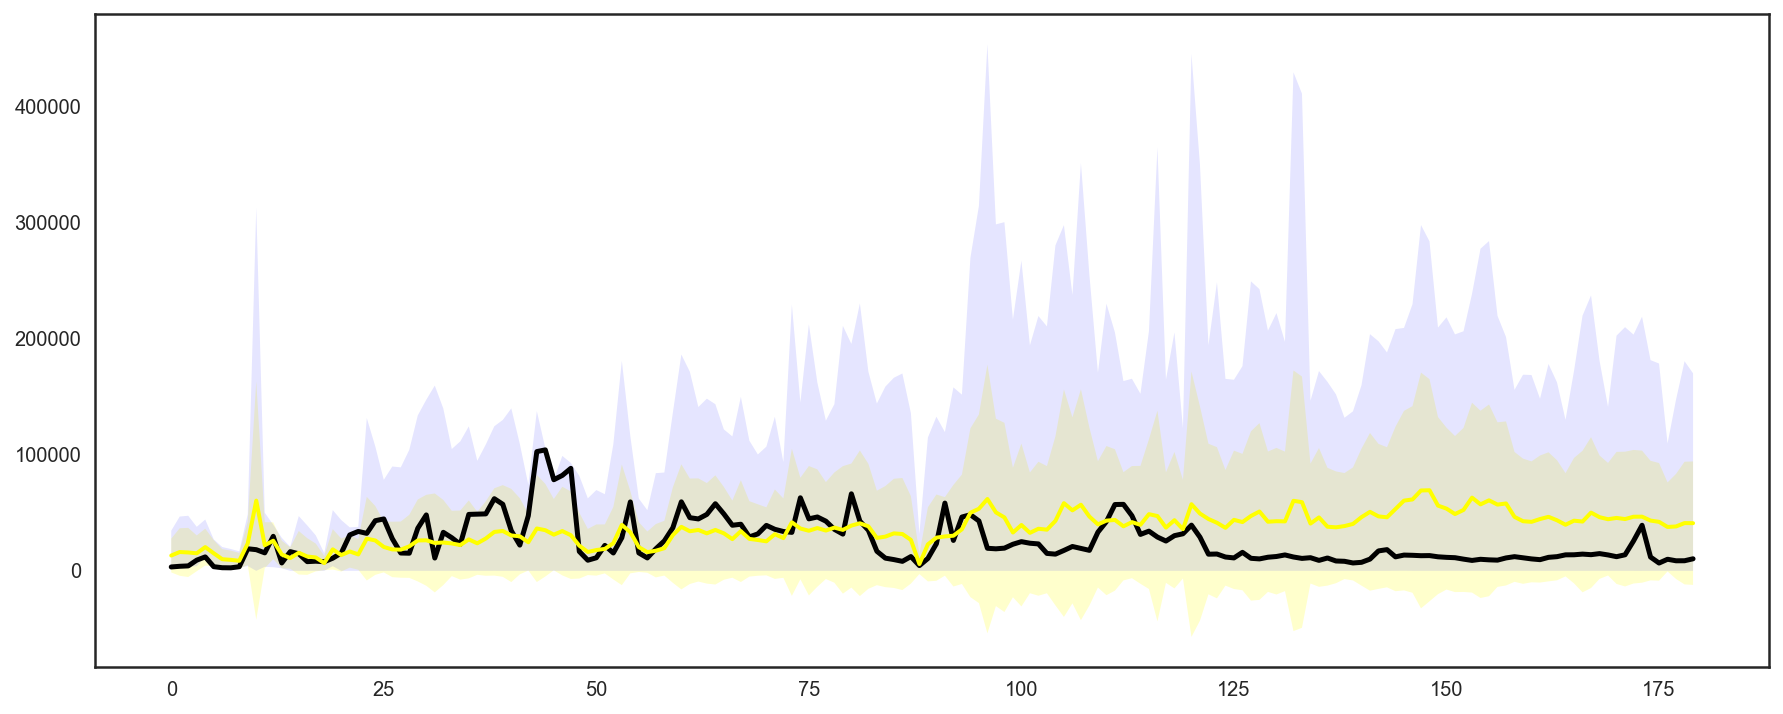

In [28]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(df_plot['t'],df_plot['avg'],lw=2.5, label=company, color='black')
ax.plot(df_plot['t'],df_plot['mean'],lw=2, label='industry baseline', color='yellow')
ax.fill_between(df_plot['t'],df_plot['mean']-df_plot['std'],df_plot['mean']+df_plot['std'], 
                        facecolor='yellow', alpha=0.2)
ax.fill_between(df_plot['t'],df_plot['min'],df_plot['max'], facecolor='blue', alpha=0.1)

#ax.set_xticks(df_plot['t'].values.tolist()[::5])
#ax.set_xticklabels(df_plot['time_period'].values.tolist()[::2], rotation=45)

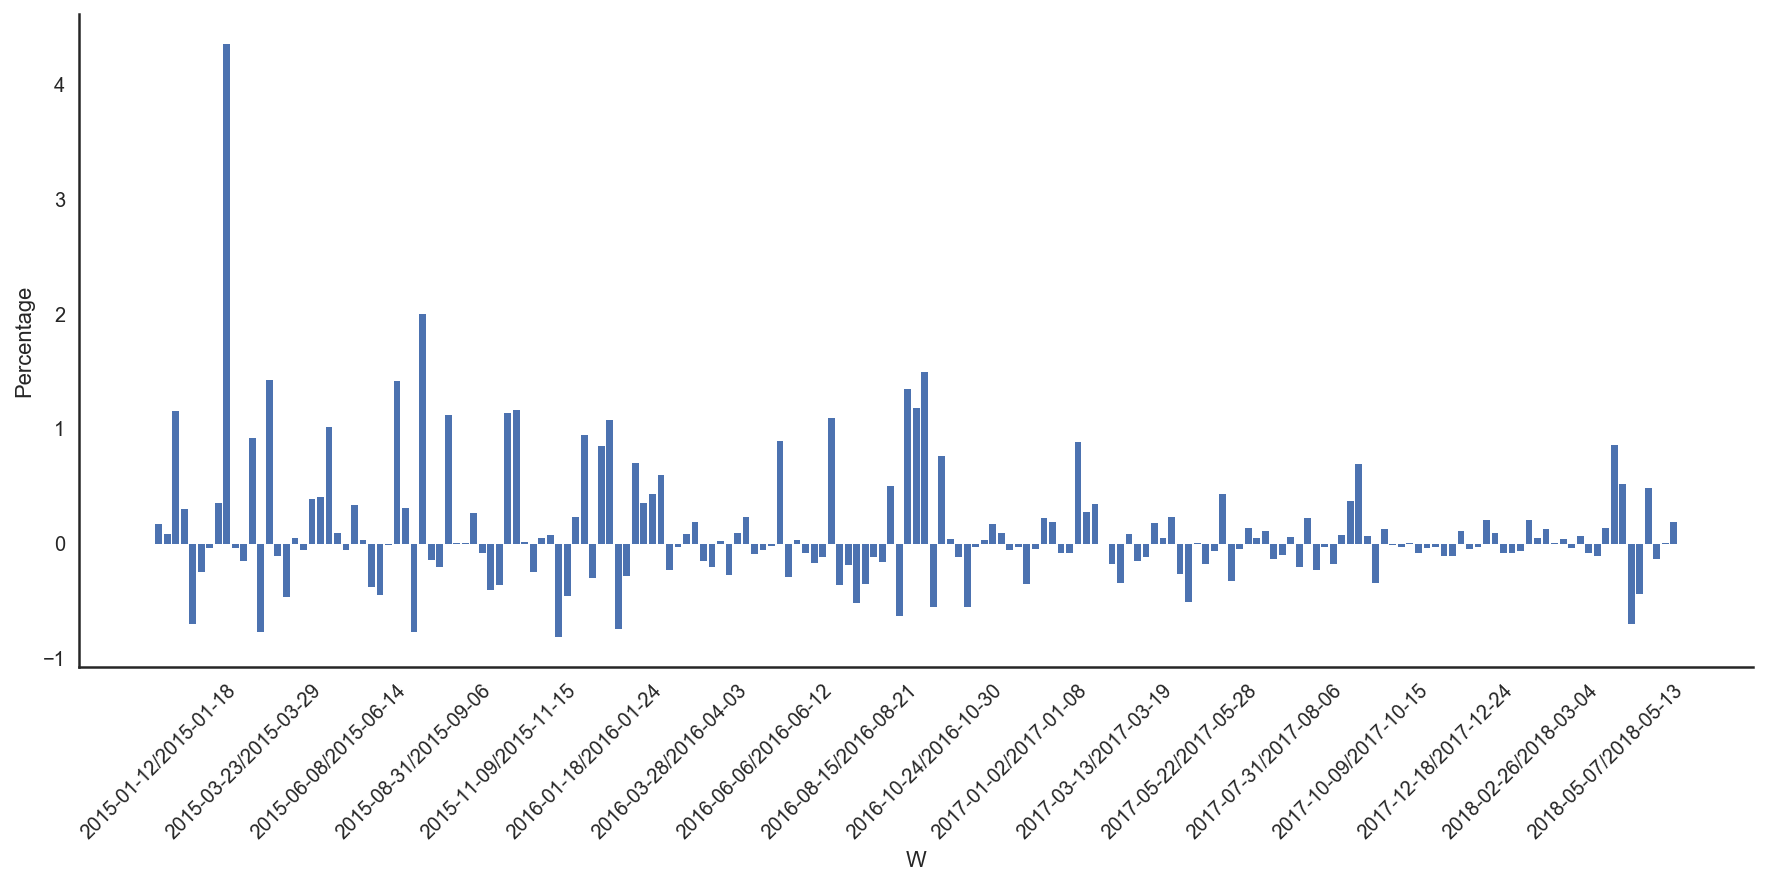

In [29]:
by = p

baseline = 0
temp = df_plot[col+'_inc'].values.tolist()
temp.pop(0)

fig, ax = plt.subplots(figsize = (15,6))
ax.bar(range(len(temp)), temp, bottom=baseline)

#ax.set_title("Percentage Change of {0}: {1} (Industry: {2})".format(interaction, company,industry))
ax.set_ylabel("Percentage")
ax.set_xlabel(by)

freq = len(df_plot['t'].values.tolist())//20 + 1
ax.set_xticks(df_plot['t'].values.tolist()[::freq])
ax.set_xticklabels(df_plot['time_period'].values.tolist()[::freq], rotation=45)
sns.despine()

In [33]:
def social_trend(company, interaction, by, 
                 compare = True, 
                 percentage_change = False,
                 data = facebook3):

    period = {'Day': 'D',
          'Week': 'W',
          'Quarter': 'Q',
          'Month': 'M',
          'Year': 'A'}
    
    cols = {'Were-Here': 'were_here_count',
            'Check-Ins': 'checkins',
            'Likes': 'likes',
            'Talking-About':'talking_about_count'}
    
    col = cols.get(interaction)
    p = period.get(by)
    
    df_plot, industry = company_trend(data,company,col,p)
    df_plot['t'] = df_plot.index
    
    fig, ax = plt.subplots(figsize = (15,6))

    if compare and industry != 'Not Available':
        
        df_ind,_ = industry_baseline(data,industry,col,p)
        df_plot = df_plot.merge(df_ind,how = 'left',on='time_period')

        ax.plot(df_plot['t'],df_plot['mean'],lw=2, label='Industry Baseline: {}'.format(industry), color='yellow')
        ax.plot(df_plot['t'],df_plot['avg'],lw=2.5, label=company, color='black')
        ax.fill_between(df_plot['t'],df_plot['mean']-df_plot['std'],df_plot['mean']+df_plot['std'], 
                        facecolor='yellow', label='Industry Mean +/- sd', alpha=0.2)
        ax.fill_between(df_plot['t'],df_plot['min'],df_plot['max'], 
                        facecolor='blue',label='Industry Minimum and Maximum', alpha=0.1)
        ax.legend(loc='upper left')
        ax.set_title("Trend of {0}: {1} (Industry: {2})".format(interaction, company,industry))
        ax.set_ylabel("Counts")
    
    elif percentage_change:

        baseline = 0
        temp = df_plot[col+'_inc'].values.tolist()
        temp.pop(0)

        ax.bar(range(len(temp)), temp, bottom=baseline)

        ax.set_title("Percentage Change of {0}: {1} (Industry: {2})".format(interaction, company,industry))
        ax.set_ylabel("Percentage")
        
    else:
        ax.plot(df_plot['t'],df_plot['avg'],lw=2.5, label=company, color='black')
        ax.set_title("Trend of {0}: {1} (Industry: {2})".format(interaction, company,industry))
        ax.set_ylabel("Counts")

    ax.set_xlabel(by)
    freq = len(df_plot['t'].values.tolist())//20 + 1
    ax.set_xticks(df_plot['t'].values.tolist()[::freq])
    ax.set_xticklabels(df_plot['time_period'].values.tolist()[::freq], rotation=45)
    sns.despine()

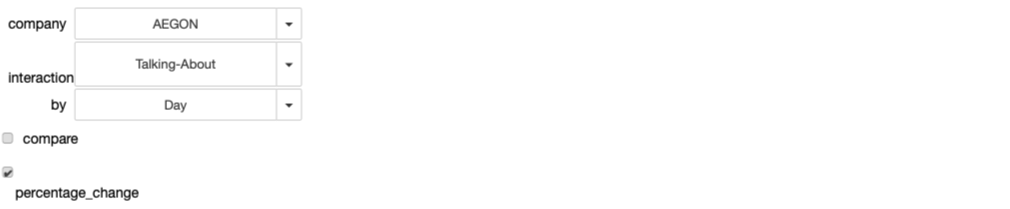

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


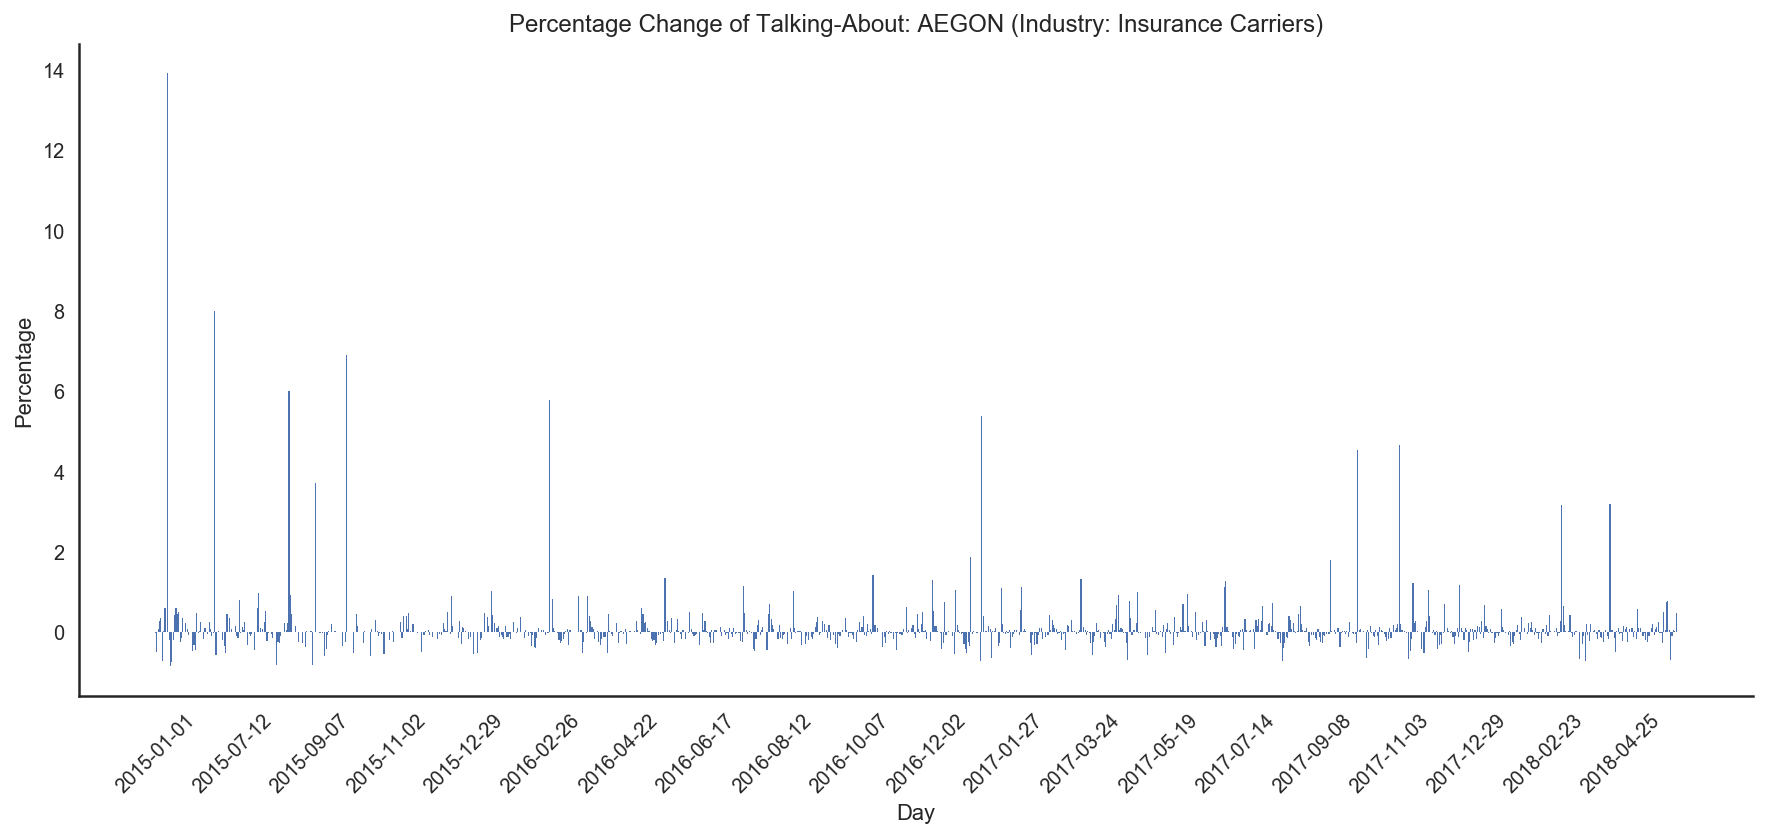

In [34]:
user_list_temp = facebook3['user'].value_counts().sort_index().index.tolist()
interact(social_trend, 
                    company = user_list_temp,
                    interaction = ['Talking-About','Check-Ins','Likes','Were-Here'],
                    by = ['Week','Day','Month','Quarter','Year'],
                    compare = False,
                    percentage_change = False,
                    data = fixed(facebook3))

------

In [67]:
#facebook3.dtypes

In [ ]:
# some new features
# 1. sd
# 2. mean
# 3. diff_baseline

#### Focus on Some Industries

In [35]:
focus_industry = ['Business Services',
 'Communications',
 'Miscellaneous Retail',
 'Food and Kindred Products',
 'Eating and Drinking Places',
 'Apparel, Finished Products from Fabrics & Similar Materials',
 'Apparel and Accessory Stores',
 'Insurance Carriers',
 'Food Stores',
 'Wholesale Trade - Nondurable Goods',
 'Transportation Services',
 'Real Estate',
 'Hotels, Rooming Houses, Camps, and Other Lodging Places',
 'Transportation by Air',
 'Motion Pictures',
 'Health Services',
 'Amusement and Recreation Services']

In [36]:
good = facebook3['industry_short'].isin(focus_industry)
facebook4 = facebook3[good]

In [37]:
facebook4.shape

(252111, 19)

In [38]:
len(facebook4['user'].value_counts())

281

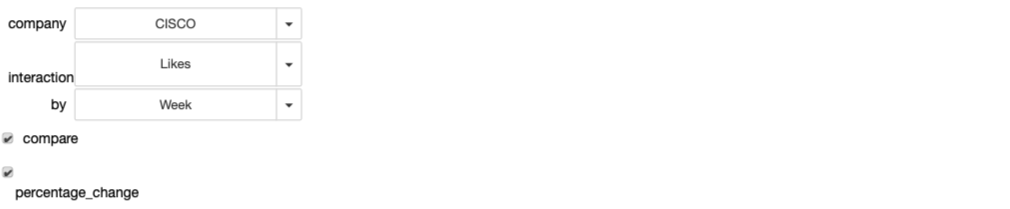

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


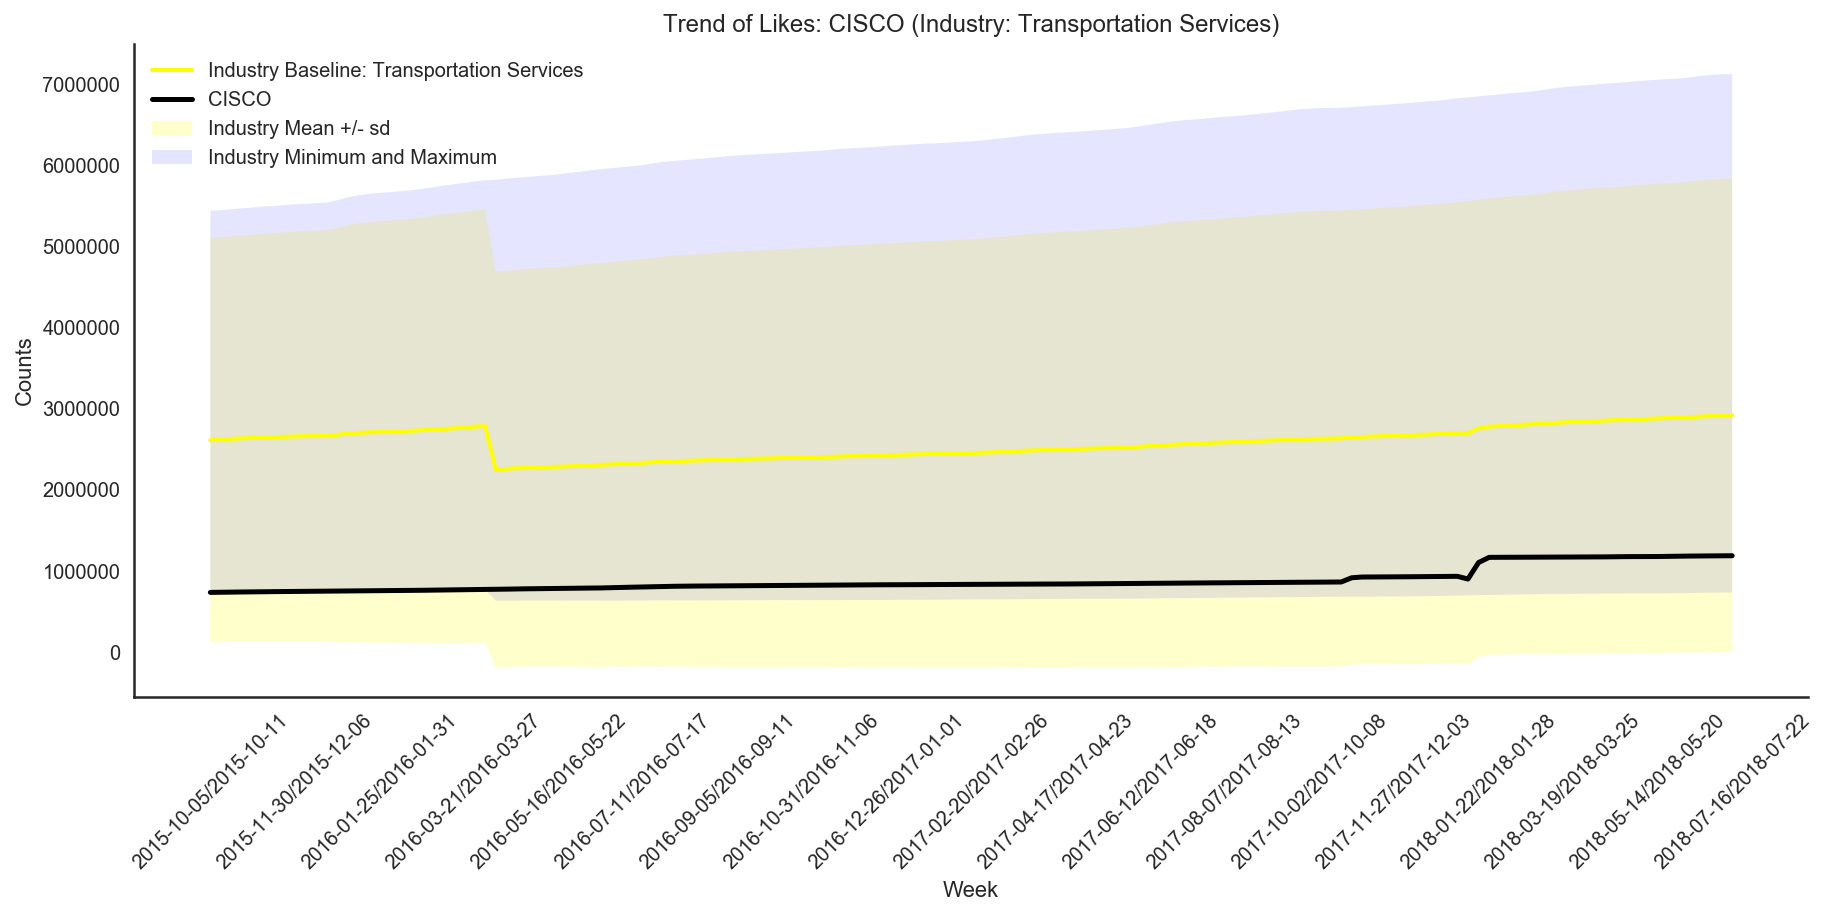

In [40]:
user_list_temp = facebook4['user'].value_counts().sort_index().index.tolist()
interact(social_trend, 
                    company = user_list_temp,
                    interaction = ['Talking-About','Check-Ins','Likes','Were-Here'],
                    by = ['Week','Day','Month','Quarter','Year'],
                    compare = False,
                    percentage_change = False,
                    data = fixed(facebook4))

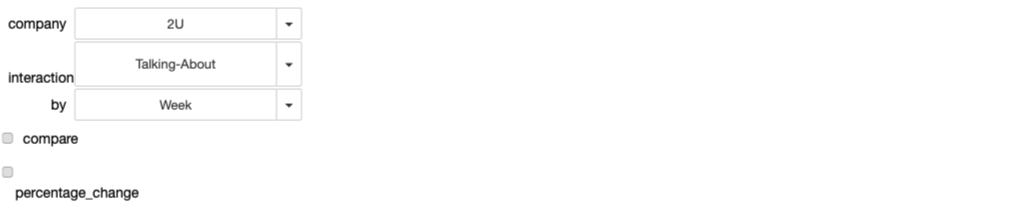

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


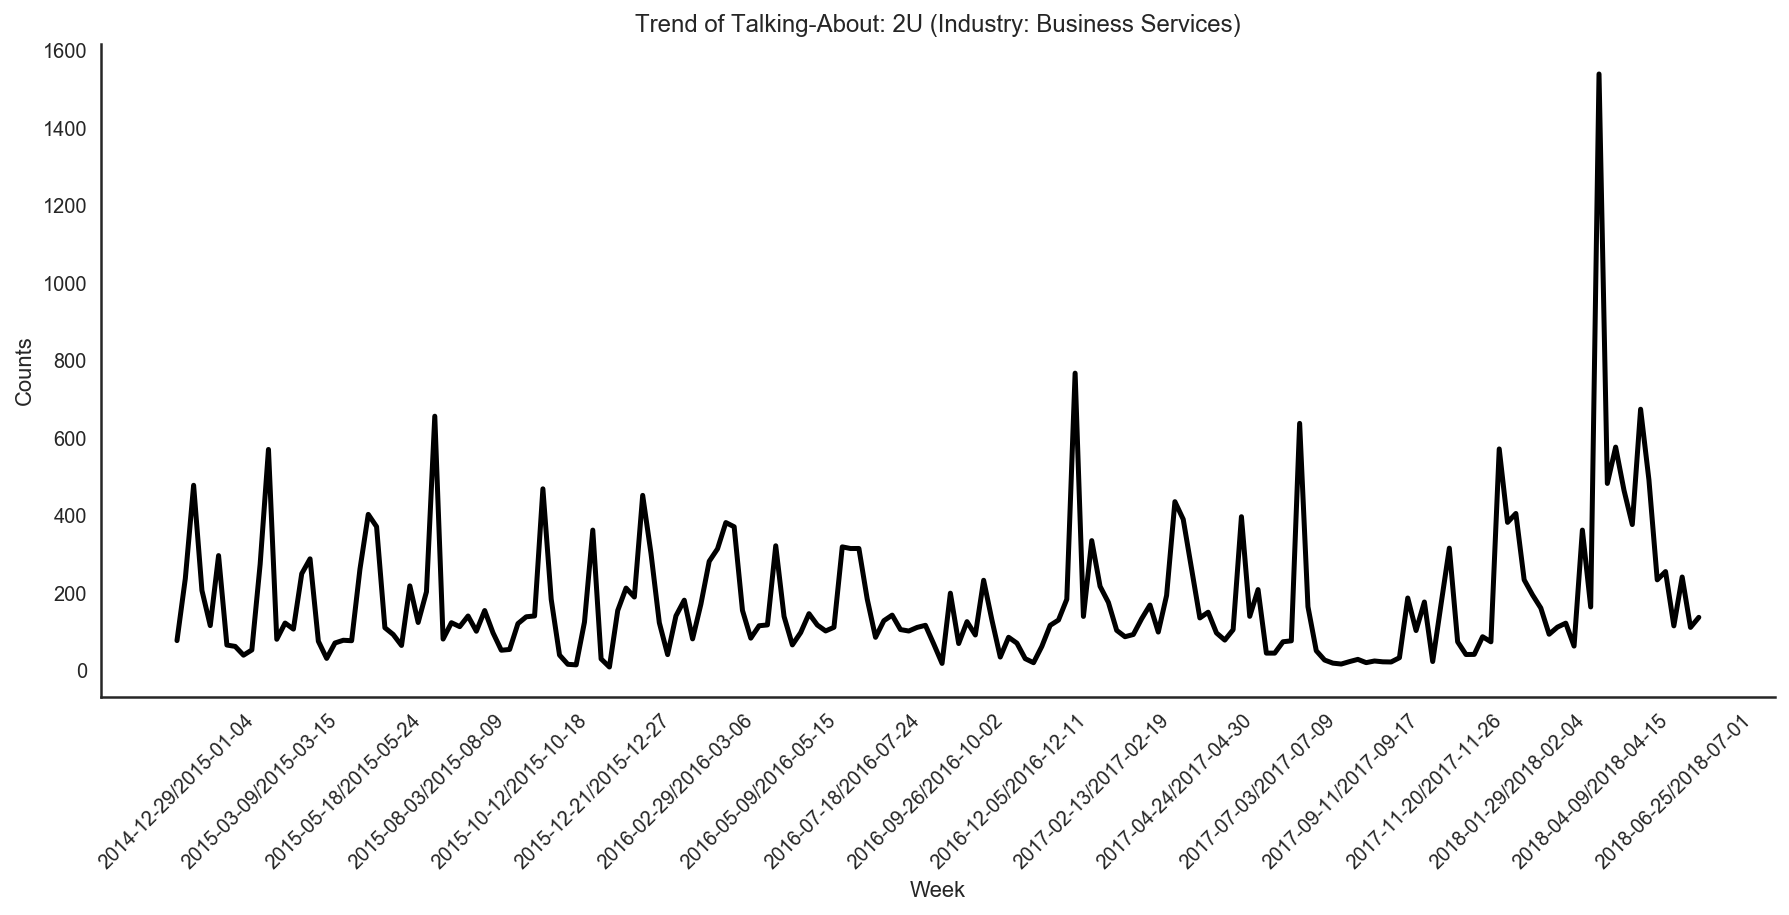

In [350]:
user_list_temp = facebook4['user'].value_counts().sort_index().index.tolist()
w = interact(social_trend, 
                    company = user_list_temp,
                    interaction = ['Talking-About','Check-Ins','Likes','Were-Here'],
                    by = ['Week','Day','Month','Quarter','Year'],
                    compare = False,
                    percentage_change = False,
                    data = fixed(facebook4))

In [352]:
!conda install ipywidgets.embed

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed

PackagesNotFoundError: The following packages are not available from current channels:

  - ipywidgets.embed

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/n

In [351]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('export.html', views=[w], title='Widgets export')

ImportError: No module named 'ipywidgets.embed'

#### COV and Other Statistics

In [41]:
def company_summary(df,p):
    
    df = get_time_period(df, p)

    # group by user and time period
    df_bytime = df.groupby(['user','time_period'])[num_cols].mean()
    
    # calculate grand mean and other statistics
    df_stats = df_bytime.reset_index().groupby(['user'])[num_cols].agg({'mean','max','std','count'}).reset_index()
    df_stats.columns = df_stats.columns.map('{0[0]}_{0[1]}'.format) 
    df_stats = df_stats.rename(columns = {'user_':'user'})
    
    # volatility: (Coefficient of Variance)COV
    df_cov = df_bytime.reset_index().groupby(['user'])[num_cols].apply(lambda x: x.std()/x.mean()).reset_index()
    df_cov = df_cov.rename(columns = {'checkins': 'checkins_cov',
                                      'were_here_count':'were_here_count_cov',
                                      'likes':'likes_cov',
                                      'talking_about_count':'talking_about_count_cov'})
    # merge two datasets
    df_merge = df_cov.merge(df_stats)
    
    # percentage change: total percentage change 
    df_percent = df_bytime.reset_index()
    colnames = [col+'_inc' for col in num_cols]
    df_percent[colnames] = df_percent.sort_values('time_period').groupby(['user'])[num_cols].pct_change()
    df_percent_sum = df_percent.groupby(['user'])[colnames].sum().reset_index()
    
    # merge two datasets
    df_merge = df_merge.merge(df_percent_sum)
    
    return df_merge, df_bytime

In [46]:
num_cols

['checkins', 'were_here_count', 'likes', 'talking_about_count']

In [47]:
df_stats, df_bytime = company_summary(facebook3,'D')

In [48]:
df_stats.shape

(4891, 25)

In [49]:
df_stats.head()

user  checkins_cov  were_here_count_cov  likes_cov  \
0     1011NEWS      0.109818                  NaN   0.131756   
1  1019THEWOLF      0.157238             0.157238   0.104729   
2     1027WGUS           NaN                  NaN   0.036883   
3    105.7WROR      0.000000                  NaN   0.059841   
4    1079MIXFM      0.646586             0.646586   0.077755   

   talking_about_count_cov  checkins_count  checkins_max  checkins_mean  \
0                 0.474266             862             5       4.540603   
1                 2.898452             924          1368     962.256494   
2                 1.269305             525             0       0.000000   
3                 0.441810             527            56      56.000000   
4                 4.715265             923           742     466.907909   

   checkins_std  were_here_count_count           ...             \
0      0.498638                    862           ...              
1    151.303080                    924           ...              
2      0.000000                    525           ...              
3      0.000000                    527           ...              
4    301.895952                    923           ...              

      likes_mean     likes_std  talking_about_count_count  \
0  102831.455916  13548.666711                        862   
1   43961.665584   4604.076275                        924   
2     832.638095     30.710270                        525   
3   11583.574953    693.174906                        527   
4   33648.930661   2616.374049                        923   

   talking_about_count_max  talking_about_count_mean  talking_about_count_std  \
0                    57048              15981.010441              7579.256959   
1                   401381              13497.267316             39121.182200   
2                       42                  5.980952                 7.591655   
3                     1539                550.485769               243.210082   
4                   248937               5036.225352             23747.135977   

   checkins_inc  were_here_count_inc  likes_inc  talking_about_count_inc  
0     -0.200000                  NaN   0.491729                17.426492  
1      0.608699             0.608699   0.334942                      inf  
2           NaN                  NaN   0.132104                      inf  
3      0.000000                  NaN   0.206854                 7.362506  
4           inf                  inf   0.262952                67.107265  

[5 rows x 25 columns]

--------------------------------------------------------------------------------
Talking-About: Most Volatile Company: FORTRESSBIOTECH
Talking-About: Least Volatile Company: NTELOSWIRELESS
--------------------------------------------------------------------------------
Check-Ins: Most Volatile Company: SEALYMATTRESS
Check-Ins: Least Volatile Company: 105.7WROR
--------------------------------------------------------------------------------
Likes: Most Volatile Company: FORTRESSBIOTECH
Likes: Least Volatile Company: ALLIEDHPI
--------------------------------------------------------------------------------
Were-Here: Most Volatile Company: UNITIL
Were-Here: Least Volatile Company: ABEONABIO


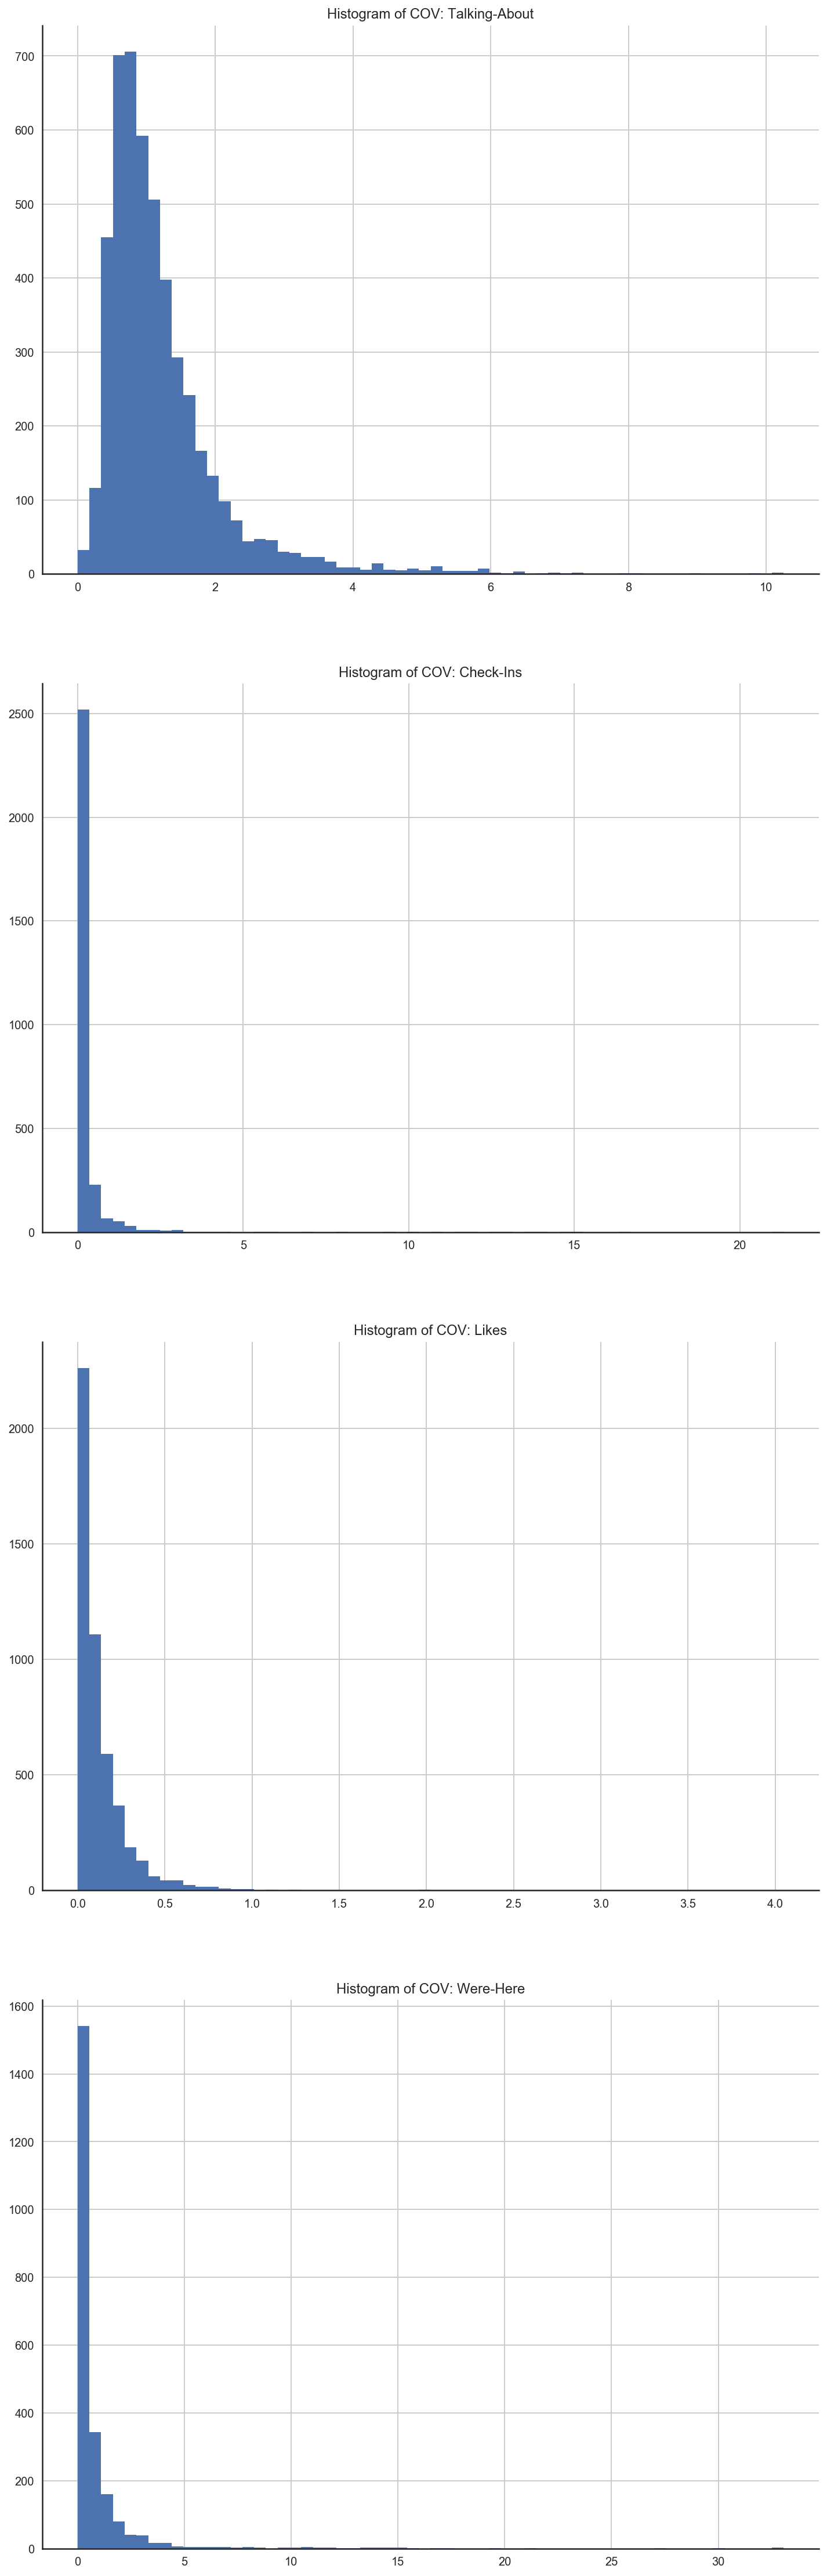

In [50]:
data = df_stats.copy()

data.set_index('user', inplace = True)

cols = {'Were-Here': 'were_here_count',
            'Check-Ins': 'checkins',
            'Likes': 'likes',
            'Talking-About':'talking_about_count'}
interaction = ['Talking-About','Check-Ins','Likes','Were-Here']

fig = plt.figure(figsize = (12,40))
idx = 1
for i in interaction:
    col = cols.get(i)+'_cov'
    string1 = '{0}: Most Volatile Company: {1}'.format(i,data[col].idxmax())
    string2 = '{0}: Least Volatile Company: {1}'.format(i,data[col].idxmin())
    print('--'*40)
    print(string1)
    print(string2)

    ax = fig.add_subplot(4, 1, idx)
    ax = data[col].hist(bins=60)
    ax.set_title('Histogram of COV: {0}'.format(i))
    sns.despine()
    idx = idx + 1
    
del data

In [1014]:
top50_vol = df_stats['talking_about_count_cov'].sort_values(ascending = False)[0:50]

--------------------------------------------------------------------------------
Talking-About: Most Increased Company: SISTERSCHUBERTS
Talking-About: Least Increased Company: NAPWHQ
--------------------------------------------------------------------------------
Check-Ins: Most Increased Company: BOYDGAMING
Check-Ins: Least Increased Company: DUNKINDONUTS
--------------------------------------------------------------------------------
Likes: Most Increased Company: CONCENTRIXJAPAN
Likes: Least Increased Company: BLACKBERRY
--------------------------------------------------------------------------------
Were-Here: Most Increased Company: SPPLUSCORP
Were-Here: Least Increased Company: ORIONGAZETTE


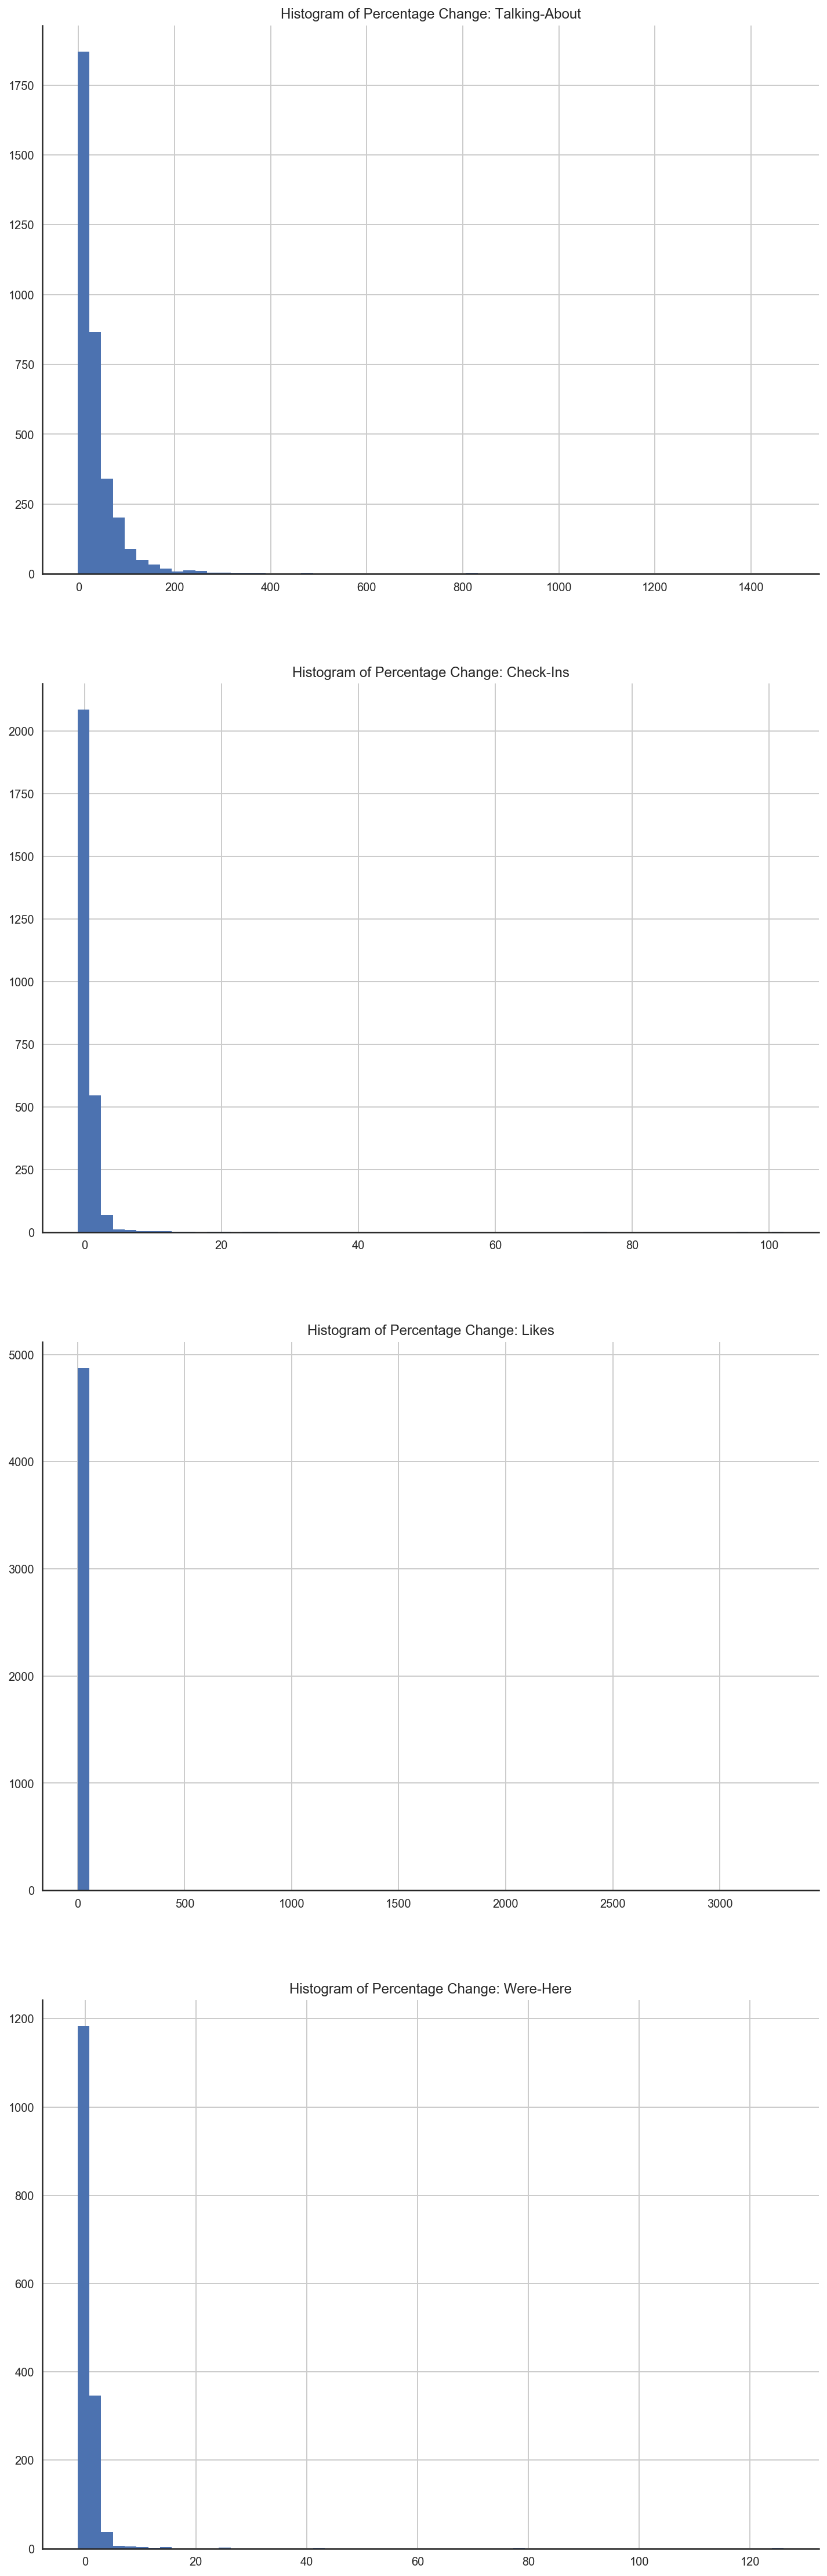

In [57]:
data = df_stats.copy()

data.set_index('user', inplace = True)

cols = {'Were-Here': 'were_here_count',
            'Check-Ins': 'checkins',
            'Likes': 'likes',
            'Talking-About':'talking_about_count'}
interaction = ['Talking-About','Check-Ins','Likes','Were-Here']

fig = plt.figure(figsize = (12,40))
idx = 1
for i in interaction:
    col = cols.get(i)+'_inc'
    string1 = '{0}: Most Increased Company: {1}'.format(i,data[col].idxmax())
    string2 = '{0}: Least Increased Company: {1}'.format(i,data[col].idxmin())
    print('--'*40)
    print(string1)
    print(string2)

    ax = fig.add_subplot(4, 1, idx)
    data[col].replace([np.inf, -np.inf], np.nan, inplace = True)
    ax = data[col].hist(bins=60)
    ax.set_title('Histogram of Percentage Change: {0}'.format(i))
    sns.despine()
    idx = idx + 1
    
del data

------

In [58]:
df_stats.dtypes

user                          object
checkins_cov                 float64
were_here_count_cov          float64
likes_cov                    float64
talking_about_count_cov      float64
checkins_count                 int64
checkins_max                   int64
checkins_mean                float64
checkins_std                 float64
were_here_count_count          int64
were_here_count_max            int64
were_here_count_mean         float64
were_here_count_std          float64
likes_count                    int64
likes_max                      int64
likes_mean                   float64
likes_std                    float64
talking_about_count_count      int64
talking_about_count_max        int64
talking_about_count_mean     float64
talking_about_count_std      float64
checkins_inc                 float64
were_here_count_inc          float64
likes_inc                    float64
talking_about_count_inc      float64
dtype: object

In [65]:
#facebook3.columns

In [61]:
notime_cols = ['dataset_id', 'facebook_id', 'username','user',
       'conm', 'gvkey', 'cusip', 'sic', 'diff', 'a/d_office', 'industry',
       'sic_2digit', 'industry_short']

In [62]:
df_notime = facebook3[notime_cols].drop_duplicates('user')

In [64]:
df_notime.shape

(4892, 13)

In [66]:
df_notime = df_notime.merge(df_stats)

In [67]:
df_notime.shape

(4891, 37)

In [69]:
#df_notime.head()

In [72]:
#industry_list

In [76]:
col = 'talking_about_count'
industry = 'Business Services'
p = 'D'
df_tka, _ = industry_baseline(facebook3,industry,col,p)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [77]:
df_tka.shape

(1239, 7)

In [78]:
df_tka.head()

time_period  min  count    max  median           std         mean
0  2015-01-01   14     30  42727    90.5  10469.921343  3553.033333
1  2015-01-03    8     32  41008    55.0   9398.555198  3090.937500
2  2015-01-04    7     29  40794    55.0   7738.427570  2178.448276
3  2015-01-06    7     31  38954    52.0   9316.307747  3275.354839
4  2015-01-07    7     28  38954    51.5   7554.327155  2243.107143

In [79]:
df_notime.dtypes

dataset_id                     int64
facebook_id                    int64
username                      object
user                          object
conm                          object
gvkey                        float64
cusip                         object
sic                          float64
diff                         float64
a/d_office                    object
industry                      object
sic_2digit                     int64
industry_short                object
checkins_cov                 float64
were_here_count_cov          float64
likes_cov                    float64
talking_about_count_cov      float64
checkins_count                 int64
checkins_max                   int64
checkins_mean                float64
checkins_std                 float64
were_here_count_count          int64
were_here_count_max            int64
were_here_count_mean         float64
were_here_count_std          float64
likes_count                    int64
likes_max                      int64
l

In [82]:
df_notime.set_index('user',inplace = True)

In [135]:
df_cov = df_notime.groupby(['industry_short'])['talking_about_count_cov'].agg({'max','idxmax'}).reset_index()

In [90]:
good = df_cov['industry_short'].isin(focus_industry)
df_cov_f = df_cov[good].sort_values('max', ascending = False)

In [91]:
df_cov_f

industry_short        idxmax       max
6                                   Business Services      ATTUNITY  5.312439
8                                      Communications        VIACOM  5.171791
18                          Food and Kindred Products      FRESHPET  3.793494
11                         Eating and Drinking Places      SHOWTIME  2.965200
28                                 Insurance Carriers     TRUPANION  2.355608
3   Apparel, Finished Products from Fabrics & Simi...       DANSKIN  2.108244
35                                    Motion Pictures      CINEMARK  1.952172
25  Hotels, Rooming Houses, Camps, and Other Lodgi...         HYATT  1.673049
55                 Wholesale Trade - Nondurable Goods        UNIVAR  1.660956
17                                        Food Stores     DAVIDSTEA  1.631985
2                        Apparel and Accessory Stores        BAKERS  1.460789
46                                        Real Estate       REALOGY  1.439990
21                                    Health Services       INVITAE  1.337660
34                               Miscellaneous Retail      AMERIGAS  1.220936
53                              Transportation by Air         FEDEX  1.128678
52                            Transportation Services    MAKEMYTRIP  1.058280
1                   Amusement and Recreation Services  TICKETMASTER  0.635548

In [96]:
df_cov_f.set_index('industry_short', inplace = True)

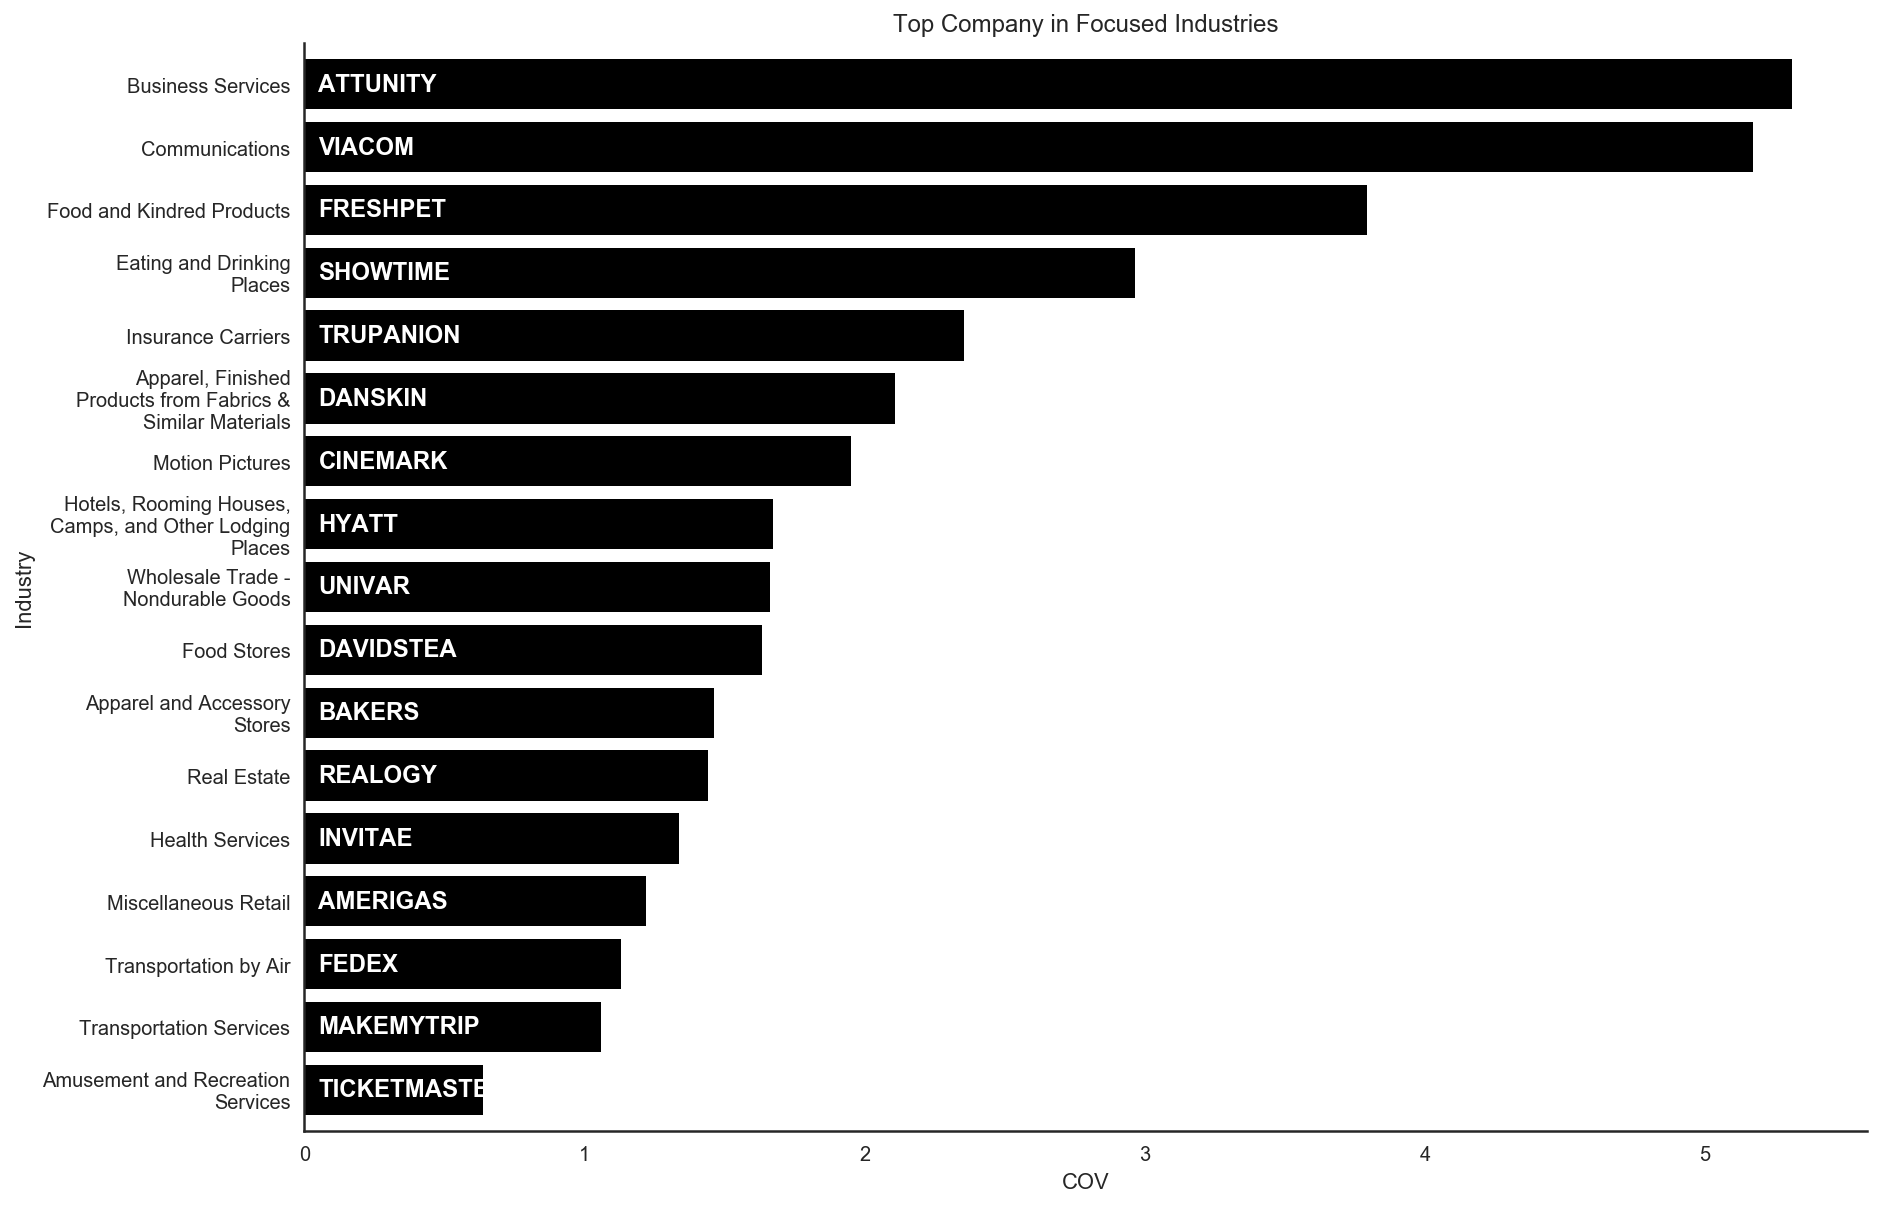

In [133]:
bardata = df_cov_f['max'][::-1]
labels = df_cov_f['idxmax'][::-1].values.tolist()
yticks = df_cov_f.index[::-1].tolist()
yticks = [ '\n'.join(wrap(l, 25)) for l in  yticks]

fig, ax = plt.subplots(figsize=(14,10))
bardata.plot.barh(color = 'black', width = 0.8)
plt.title("Top Company in Focused Industries")
plt.ylabel("Industry")
plt.xlabel("COV")
#ax.set_xticklabels([])
ax.set_yticklabels(yticks)
#plt.yticks(df_cov_f.index[::-1].tolist(), wrap = True)
for i, v in enumerate(labels):
    plt.text(0.05,i, labels[i], color='white', va='center', fontweight='bold')
sns.despine()

In [158]:
col = 'were_here_count'
df_notime[col+'_inc'].replace([np.inf, -np.inf], np.nan, inplace = True)
df_inc = df_notime.groupby(['industry_short'])[col+'_inc'].agg({'max','idxmax'}).reset_index()

In [159]:
good = df_inc['industry_short'].isin(focus_industry)
df_inc_f = df_inc[good].sort_values('max', ascending = False)
df_inc_f.set_index('industry_short', inplace = True)

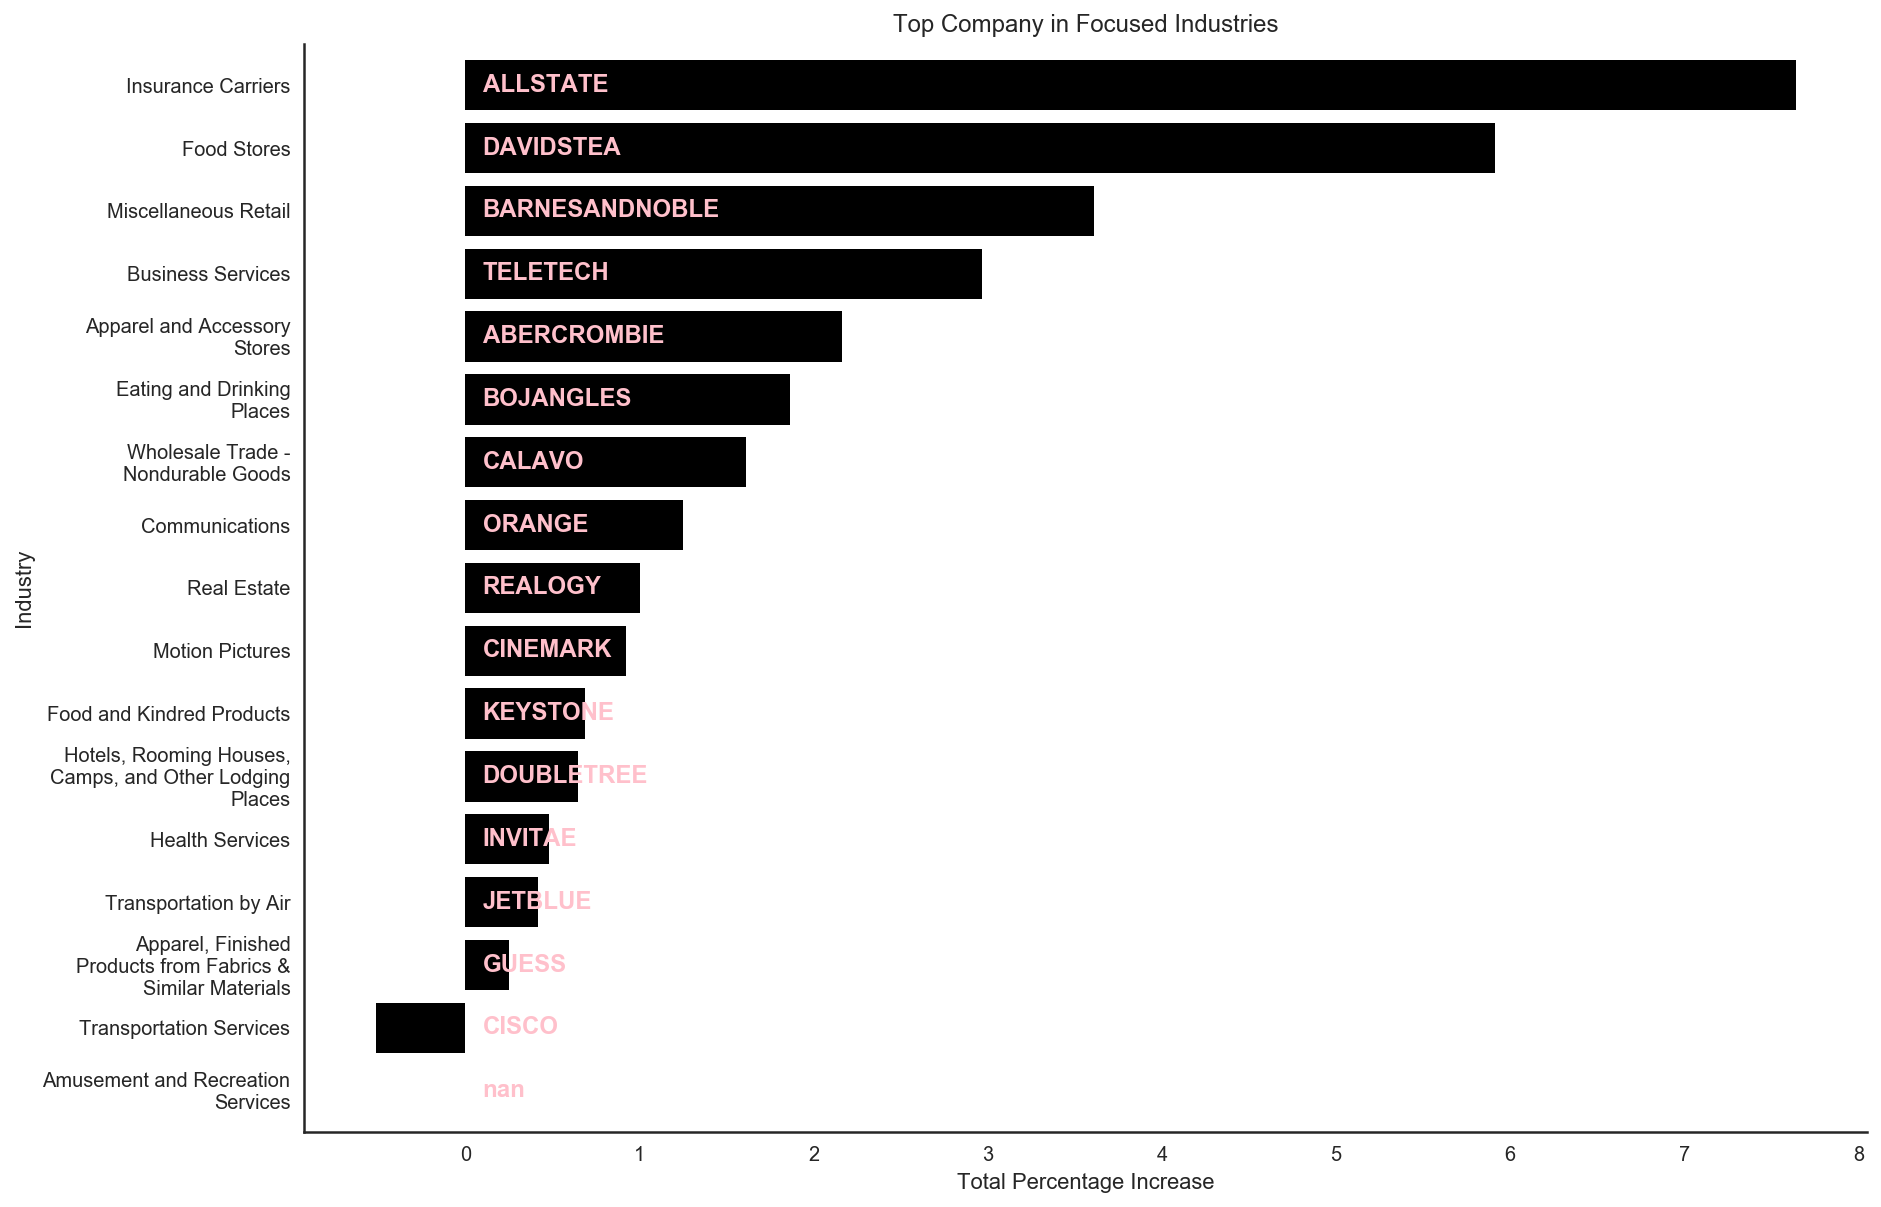

In [191]:
bardata = df_inc_f['max'][::-1]
labels = df_inc_f['idxmax'][::-1].values.tolist()
yticks = df_inc_f.index[::-1].tolist()
yticks = [ '\n'.join(wrap(l, 25)) for l in  yticks]

fig, ax = plt.subplots(figsize=(14,10))
bardata.plot.barh(color = 'black', width = 0.8)
plt.title("Top Company in Focused Industries")
plt.ylabel("Industry")
plt.xlabel("Total Percentage Increase")
#ax.set_xlim((0,10 ))
#ax.set_xticklabels([])
ax.set_yticklabels(yticks)
#plt.yticks(df_cov_f.index[::-1].tolist(), wrap = True)
for i, v in enumerate(labels):
    plt.text(0.1,i, labels[i], color='pink', va='center', fontweight='bold')
sns.despine()

### Clustering

In [196]:
#facebook3.dtypes

In [246]:
def cluster(data, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    data: A Pandas DataFrame
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    
    # build the model
    model = KMeans(n_clusters = n_clusters, random_state = random_state)
    
    # fit our data
    model.fit(data)
    
    # obtain the predictions
    clusters = model.predict(data)
    
    return model, clusters

def plot_inertia(data, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    data: A Pandas DataFrame
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # get the numbers of cluters 
    n_cl = list(range(start,end+1))
    
    # iniate an zeros for intertia values
    inertia = np.zeros(len(n_cl))
    
    # compute interia value for each model
    for idx, n in enumerate(n_cl):
        # get the model
        k_means, clusters = cluster(data, random_state = check_random_state(0), n_clusters = n)
        inertia[idx] = k_means.inertia_
        
    # make the plot
    
    sns.set(style="white")
    fig, ax = plt.subplots(figsize=(10,6))
    
    # draw the points 
    ax.set_xlim(1,10)
    plt.plot(n_cl, inertia)
    
    # add decorations
    ax.set_title("The elbow method")
    ax.set_xlabel("Number of clusters")
    ax.set_ylabel("Inertia")
    sns.set(font_scale=1.5)

    return ax

def plot_pair(data, clusters, cols):
    '''
    Uses seaborn.PairGrid to visualize the data distribution
    when axes are the first four principal components.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    data: A numpy array. 
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    data = data[cols]
    data['clusters'] = clusters

    # make pair plot
    #fig, ax = plt.subplots(figsize=(20,20))
    sns.set(style="white")
    ax = sns.PairGrid(data, vars = cols, hue ="clusters")
    
    # plots on the diagonal are histograms 
    ax.map_diag(plt.hist)
    
    # plots off-diagonal are scatter plot
    ax.map_offdiag(plt.scatter)
    
    return ax

In [198]:
df_notime.columns

Index(['dataset_id', 'facebook_id', 'username', 'conm', 'gvkey', 'cusip',
       'sic', 'diff', 'a/d_office', 'industry', 'sic_2digit', 'industry_short',
       'checkins_cov', 'were_here_count_cov', 'likes_cov',
       'talking_about_count_cov', 'checkins_count', 'checkins_max',
       'checkins_mean', 'checkins_std', 'were_here_count_count',
       'were_here_count_max', 'were_here_count_mean', 'were_here_count_std',
       'likes_count', 'likes_max', 'likes_mean', 'likes_std',
       'talking_about_count_count', 'talking_about_count_max',
       'talking_about_count_mean', 'talking_about_count_std', 'checkins_inc',
       'were_here_count_inc', 'likes_inc', 'talking_about_count_inc'],
      dtype='object')

In [283]:
selected_features = [
       'checkins_cov', 'likes_cov',
       'talking_about_count_cov', 'checkins_count', 'checkins_max',
       'checkins_mean', 'checkins_std', 'were_here_count_count',
       'were_here_count_max', 'were_here_count_mean', 'were_here_count_std',
       'likes_count', 'likes_max', 'likes_mean', 'likes_std',
       'talking_about_count_count', 'talking_about_count_max',
       'talking_about_count_mean', 'talking_about_count_std', 'checkins_inc',
       'likes_inc', 'talking_about_count_inc']

In [215]:
df_cls = df_notime[selected_features].replace([np.inf, -np.inf], np.nan)

df_cls.dropna(inplace=True)

In [220]:
k_means, clusters = cluster(df_cls, random_state=check_random_state(1), n_clusters=5)

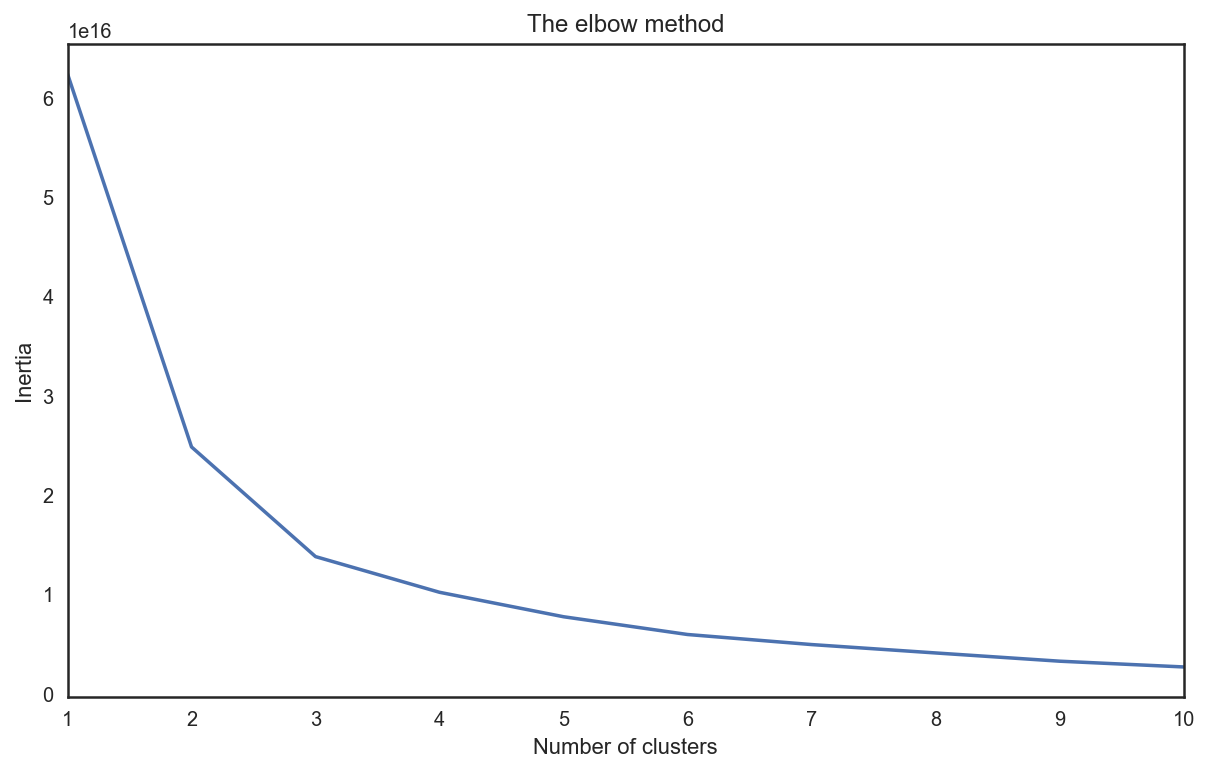

In [223]:
inertia = plot_inertia(df_cls)

In [231]:
k_means, clusters = cluster(df_cls, random_state=check_random_state(1), n_clusters=3)

In [268]:
selected_features

['checkins_cov',
 'likes_cov',
 'talking_about_count_cov',
 'checkins_count',
 'checkins_max',
 'checkins_mean',
 'checkins_std',
 'were_here_count_count',
 'were_here_count_max',
 'were_here_count_mean',
 'were_here_count_std',
 'likes_count',
 'likes_max',
 'likes_mean',
 'likes_std',
 'talking_about_count_count',
 'talking_about_count_max',
 'talking_about_count_mean',
 'talking_about_count_std',
 'checkins_inc',
 'likes_inc',
 'talking_about_count_inc']

In [238]:
selected_cols = [
       'talking_about_count_cov', 'checkins_cov',
       'talking_about_count_inc', 'checkins_inc']

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


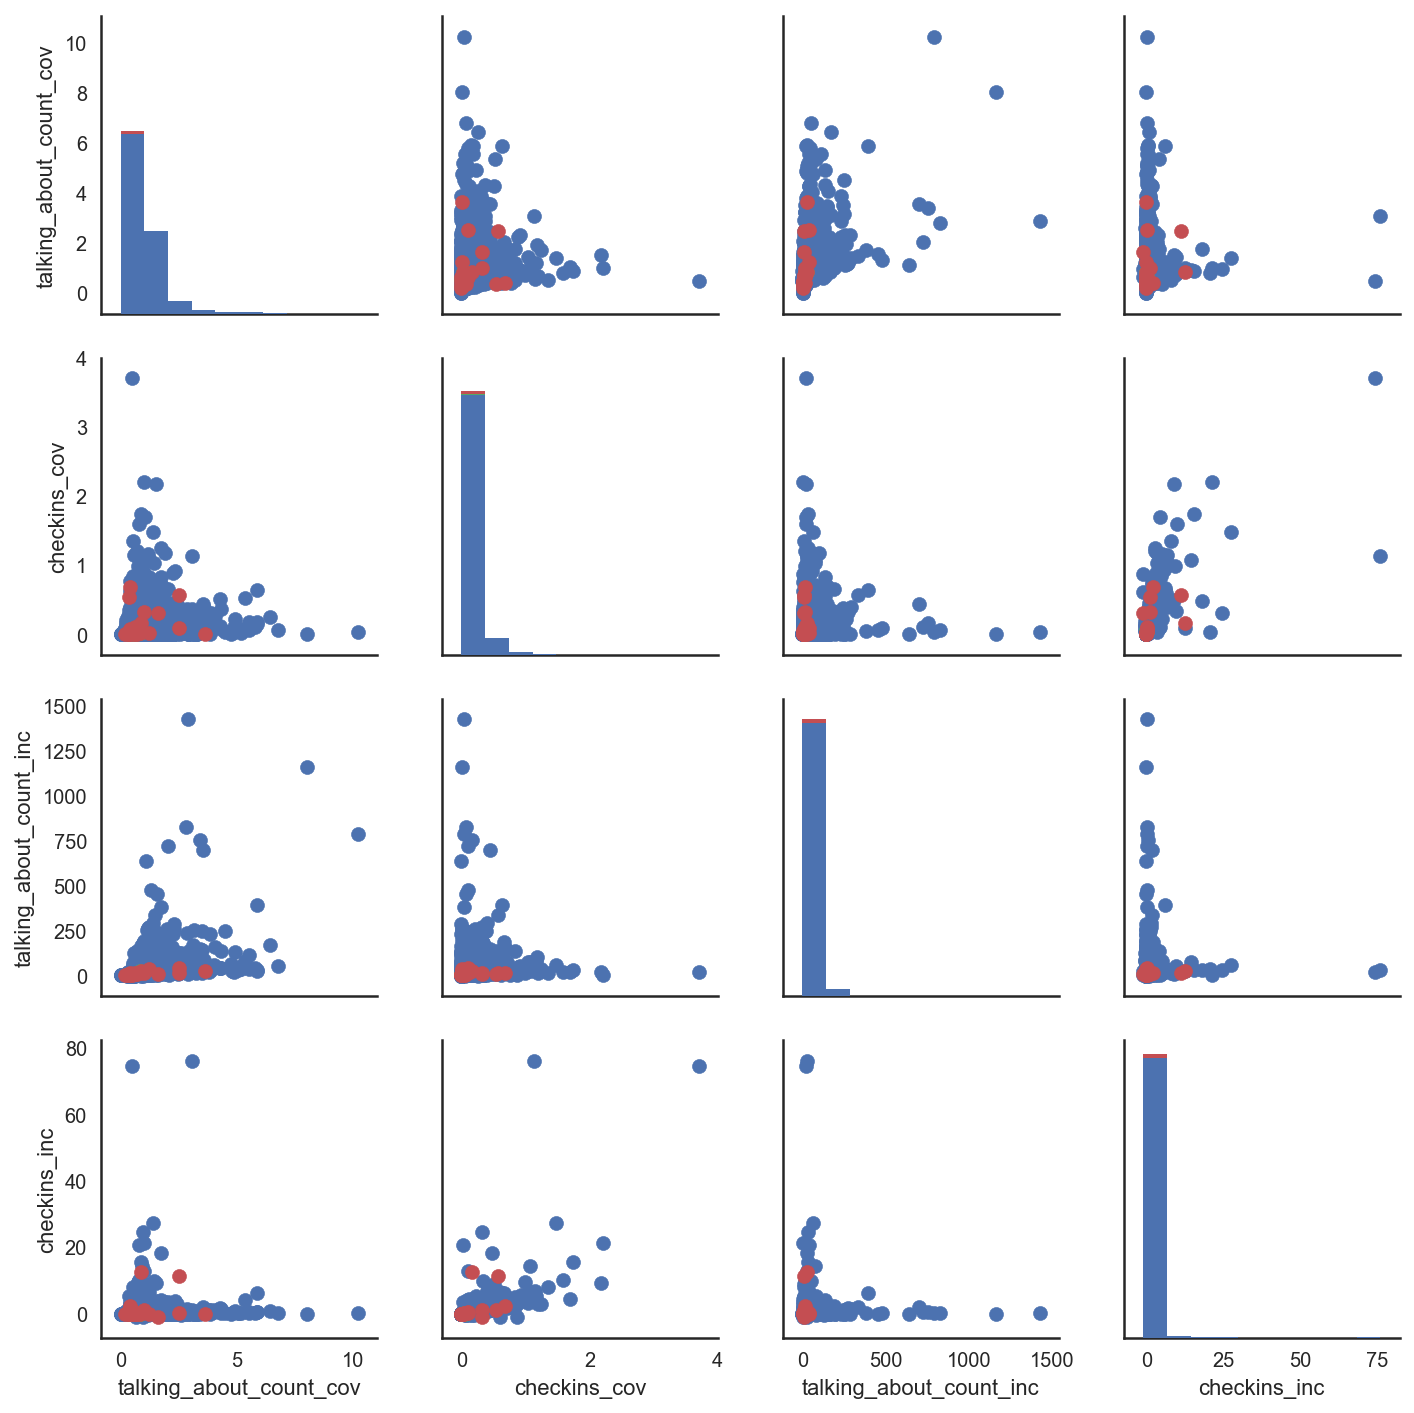

In [247]:
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


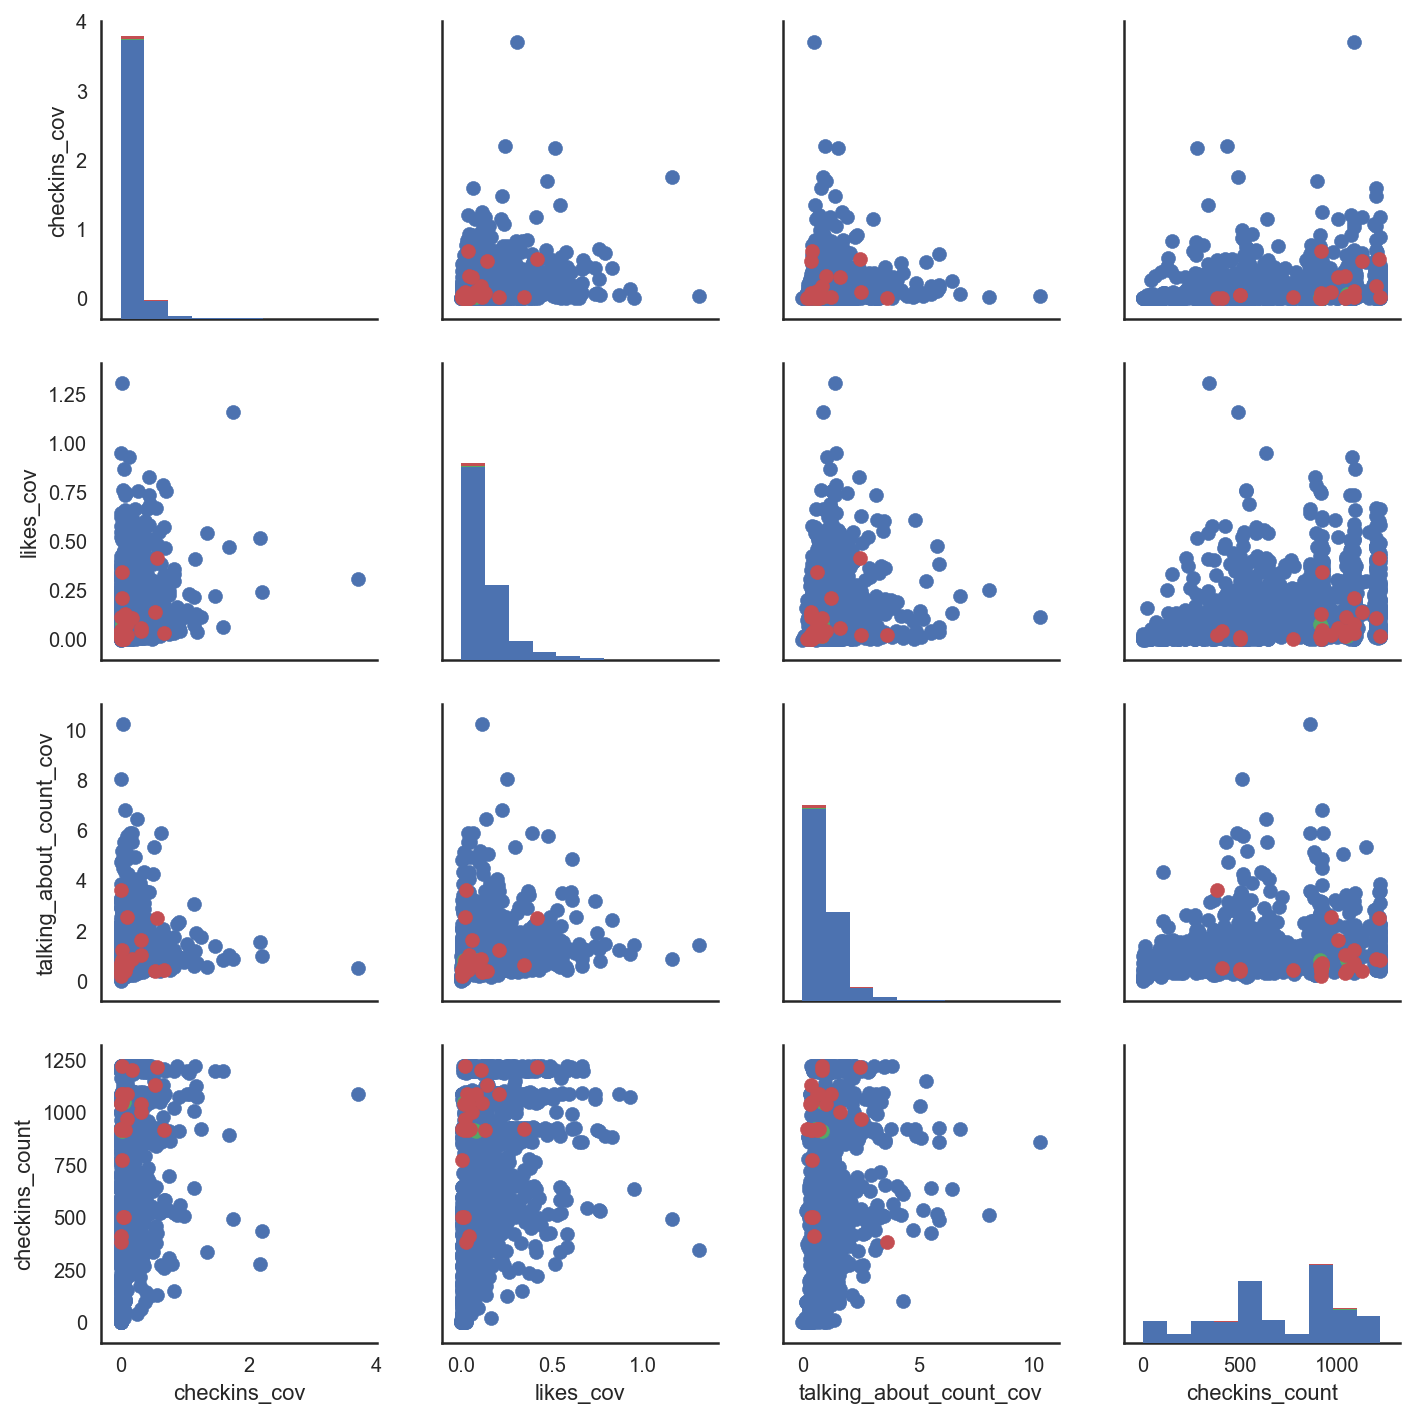

In [272]:
selected_cols = selected_features[0:4]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


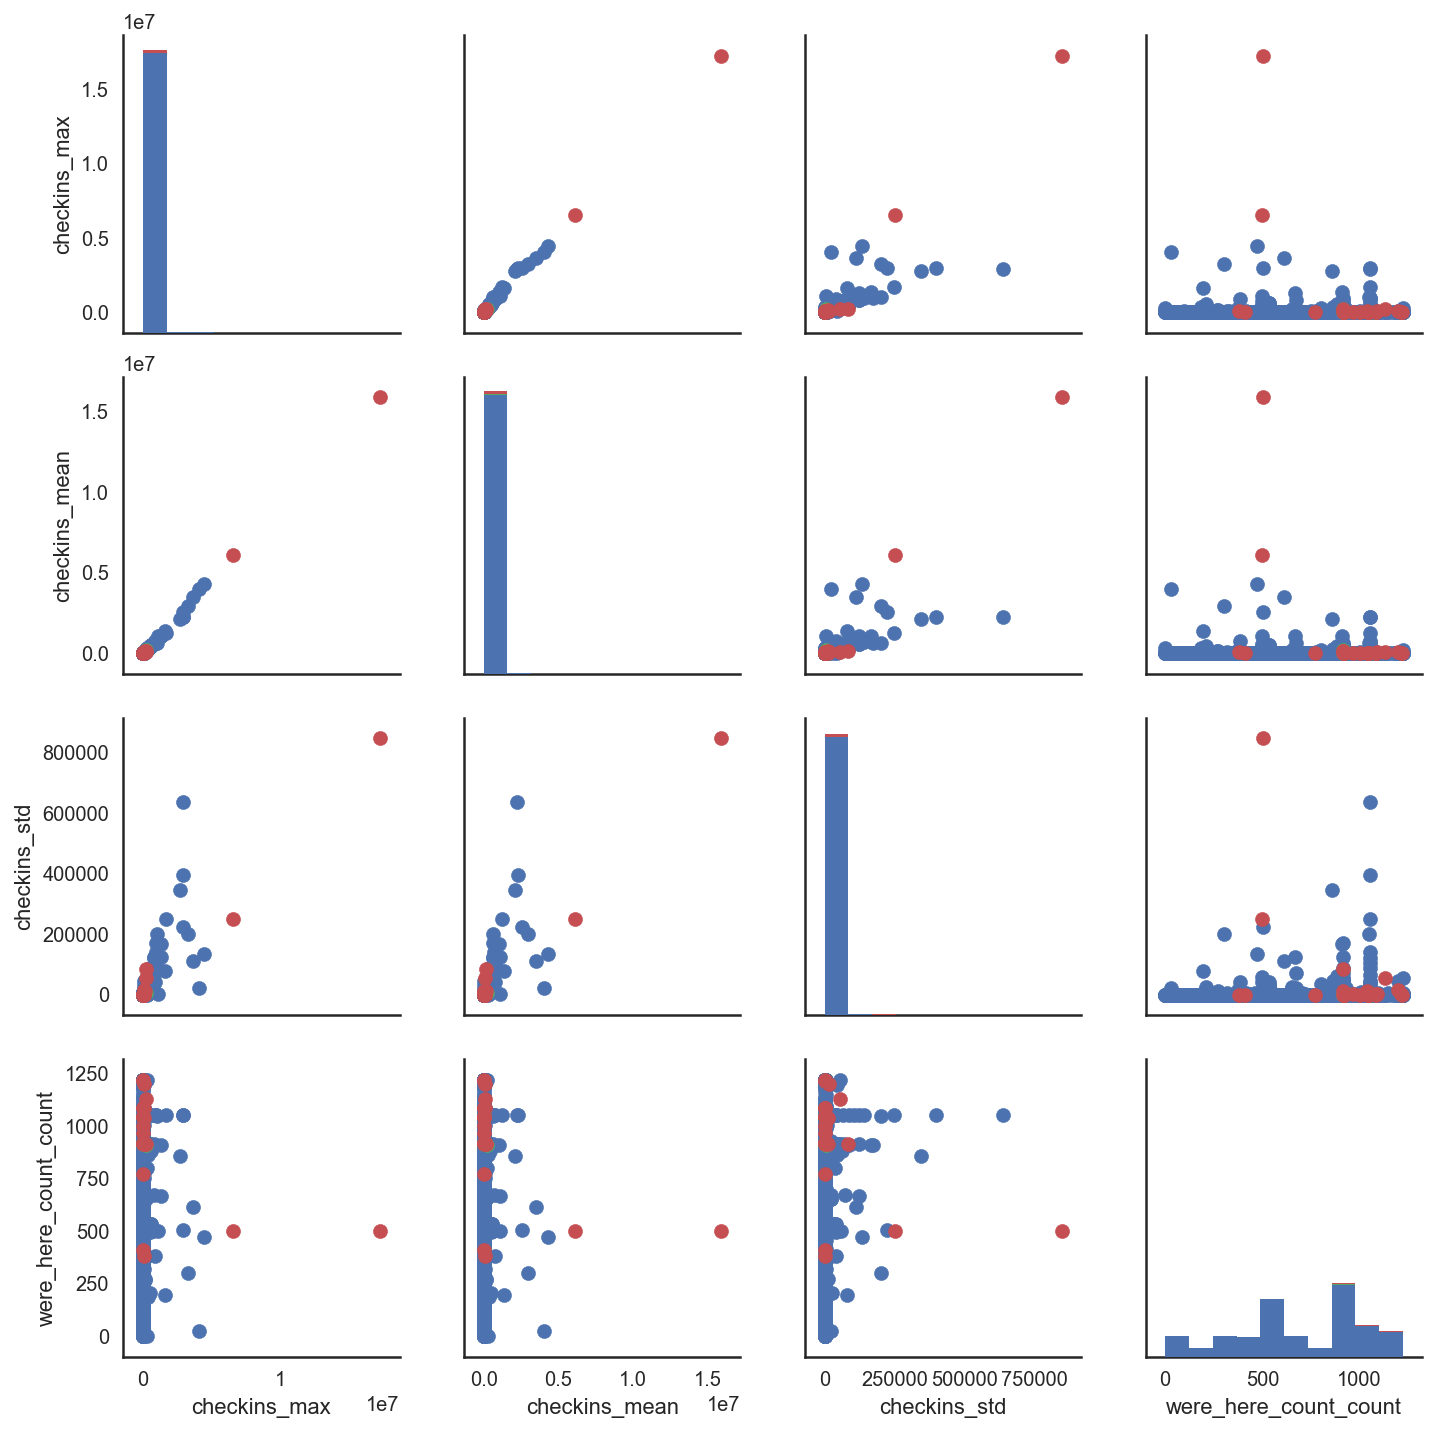

In [273]:
selected_cols = selected_features[4:8]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


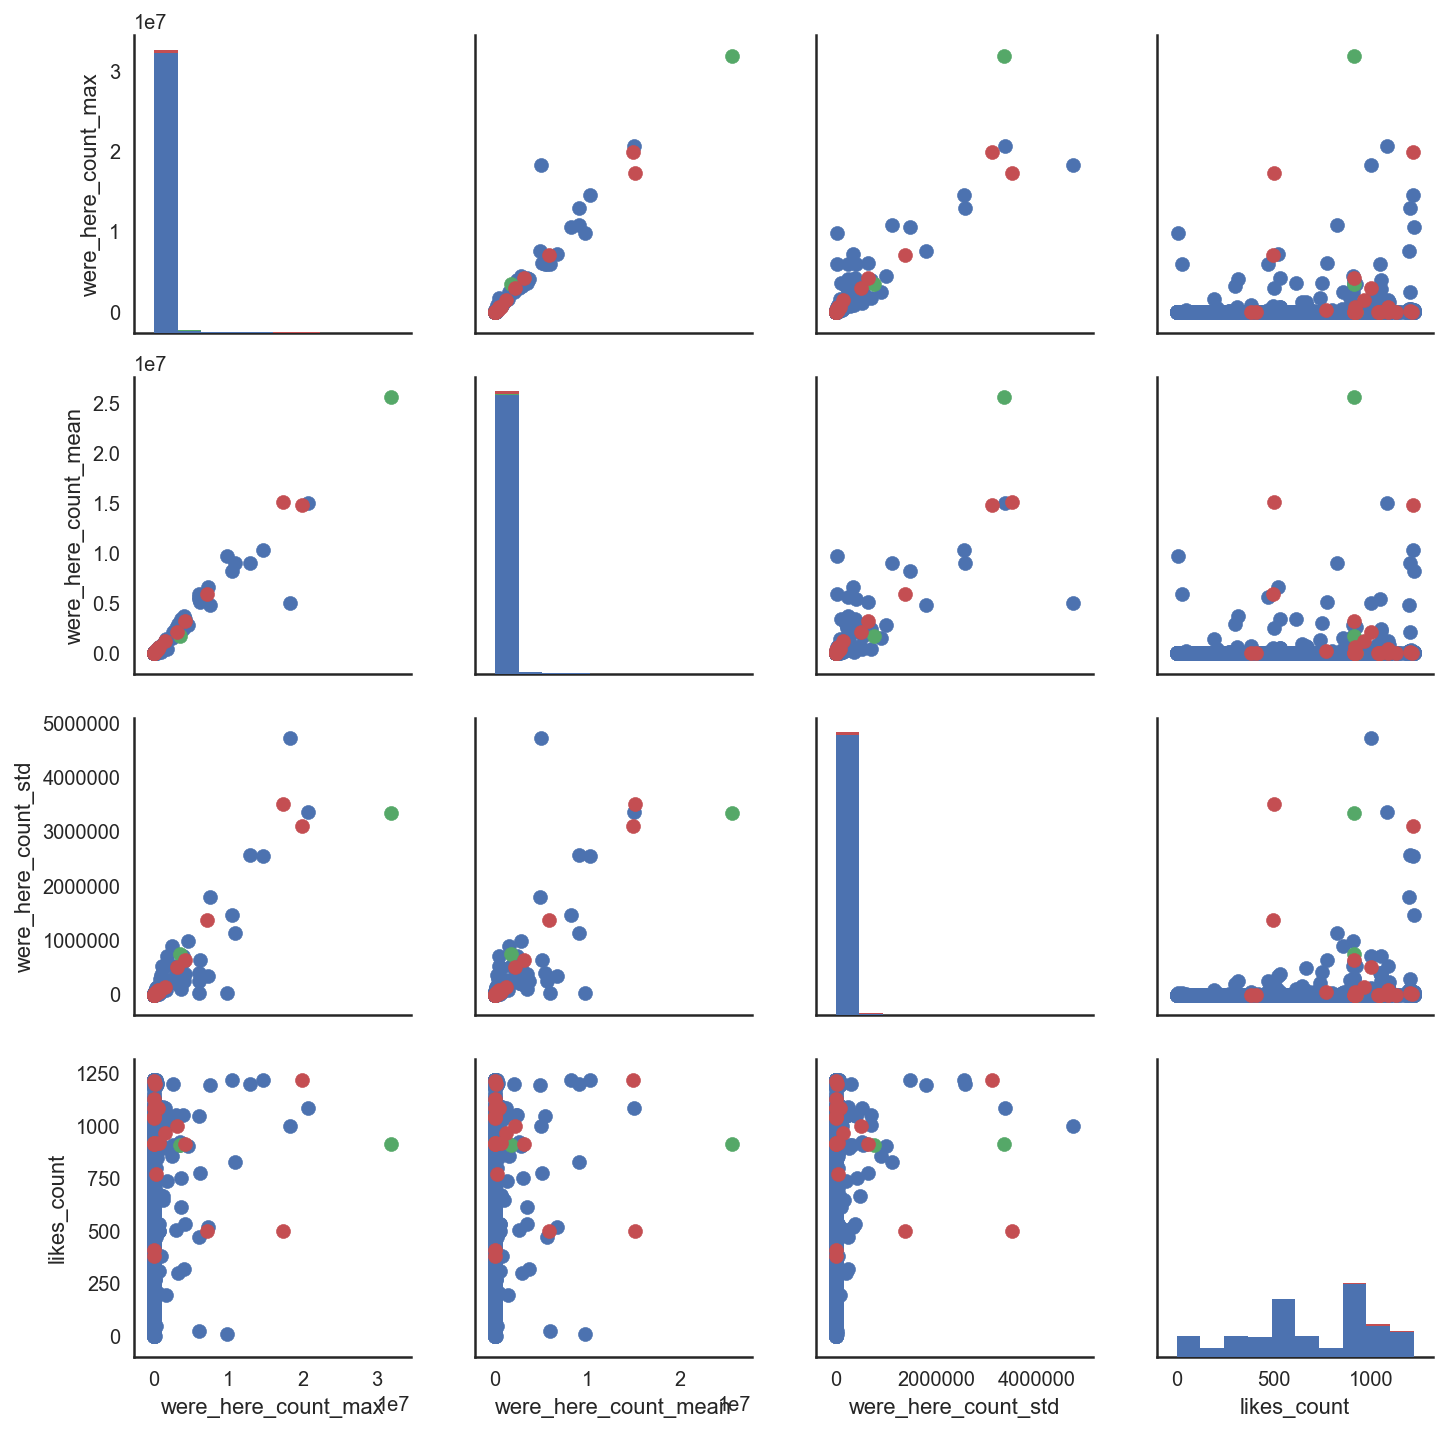

In [274]:
selected_cols = selected_features[8:12]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


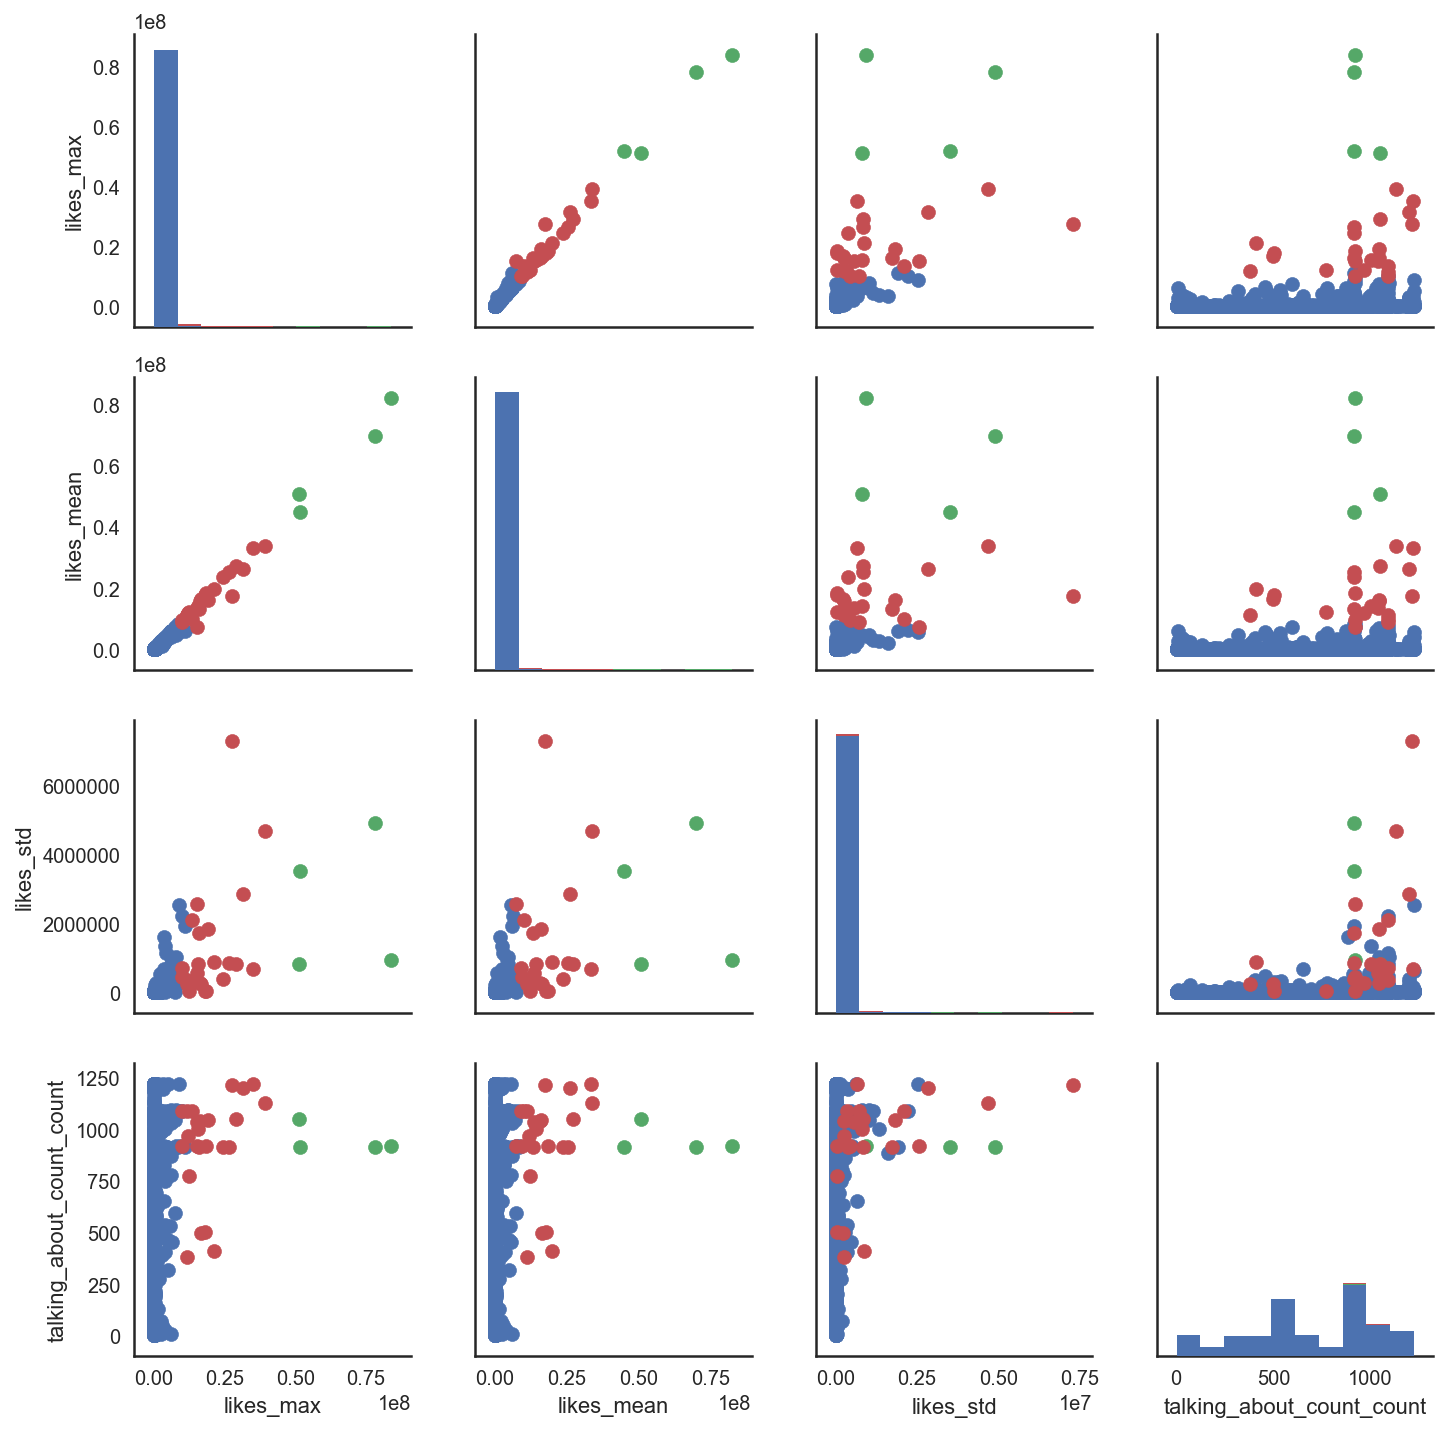

In [276]:
selected_cols = selected_features[12:16]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


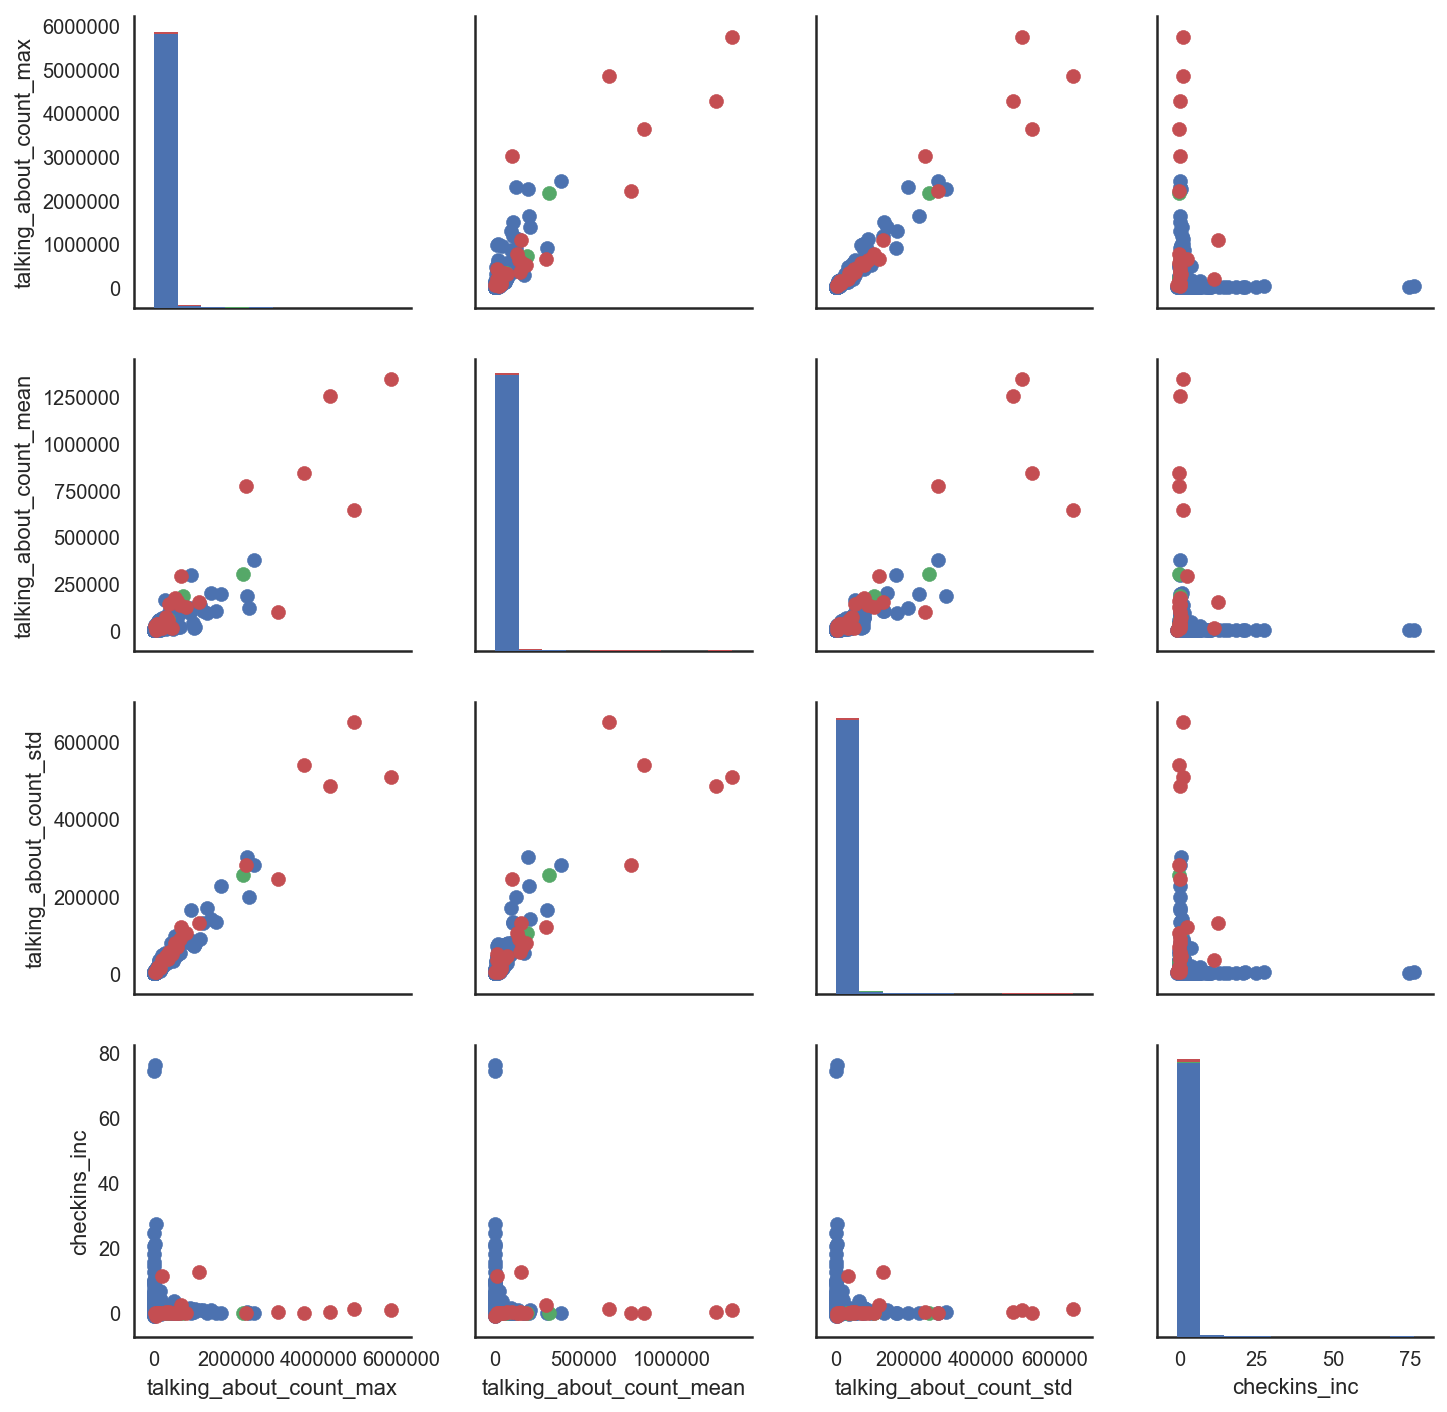

In [278]:
selected_cols = selected_features[16:20]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


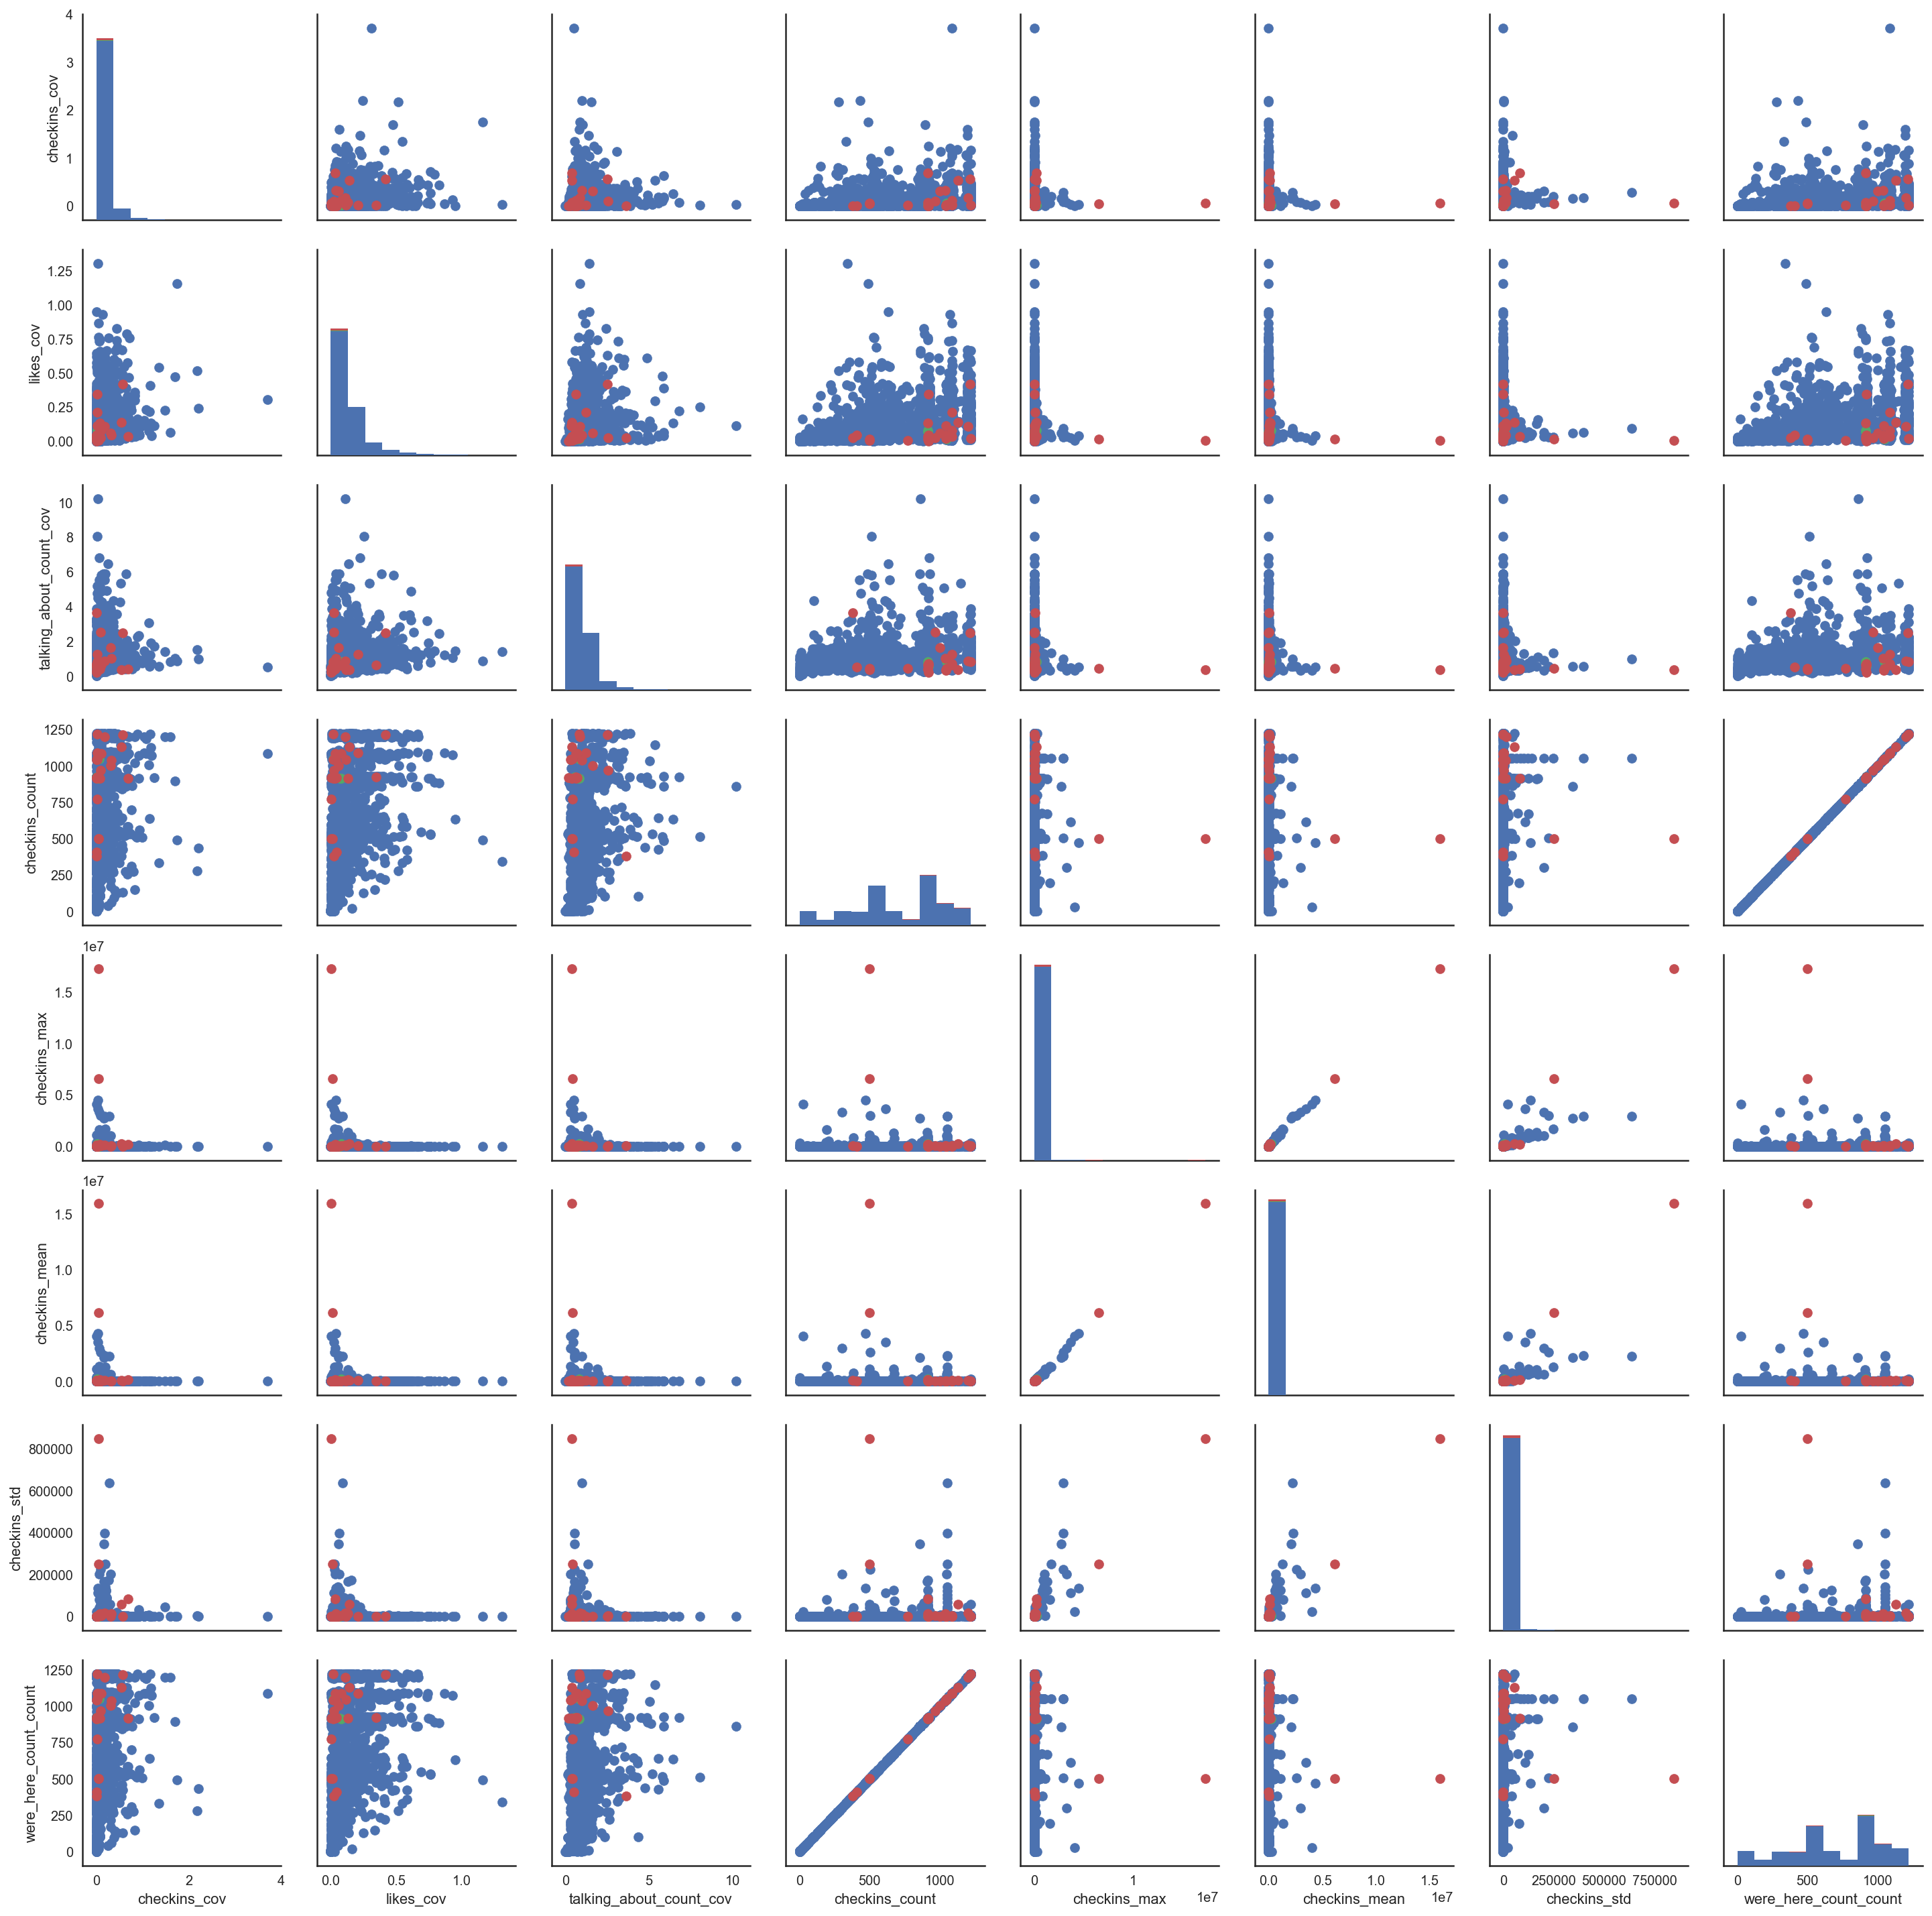

In [279]:
selected_cols = selected_features[0:8]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


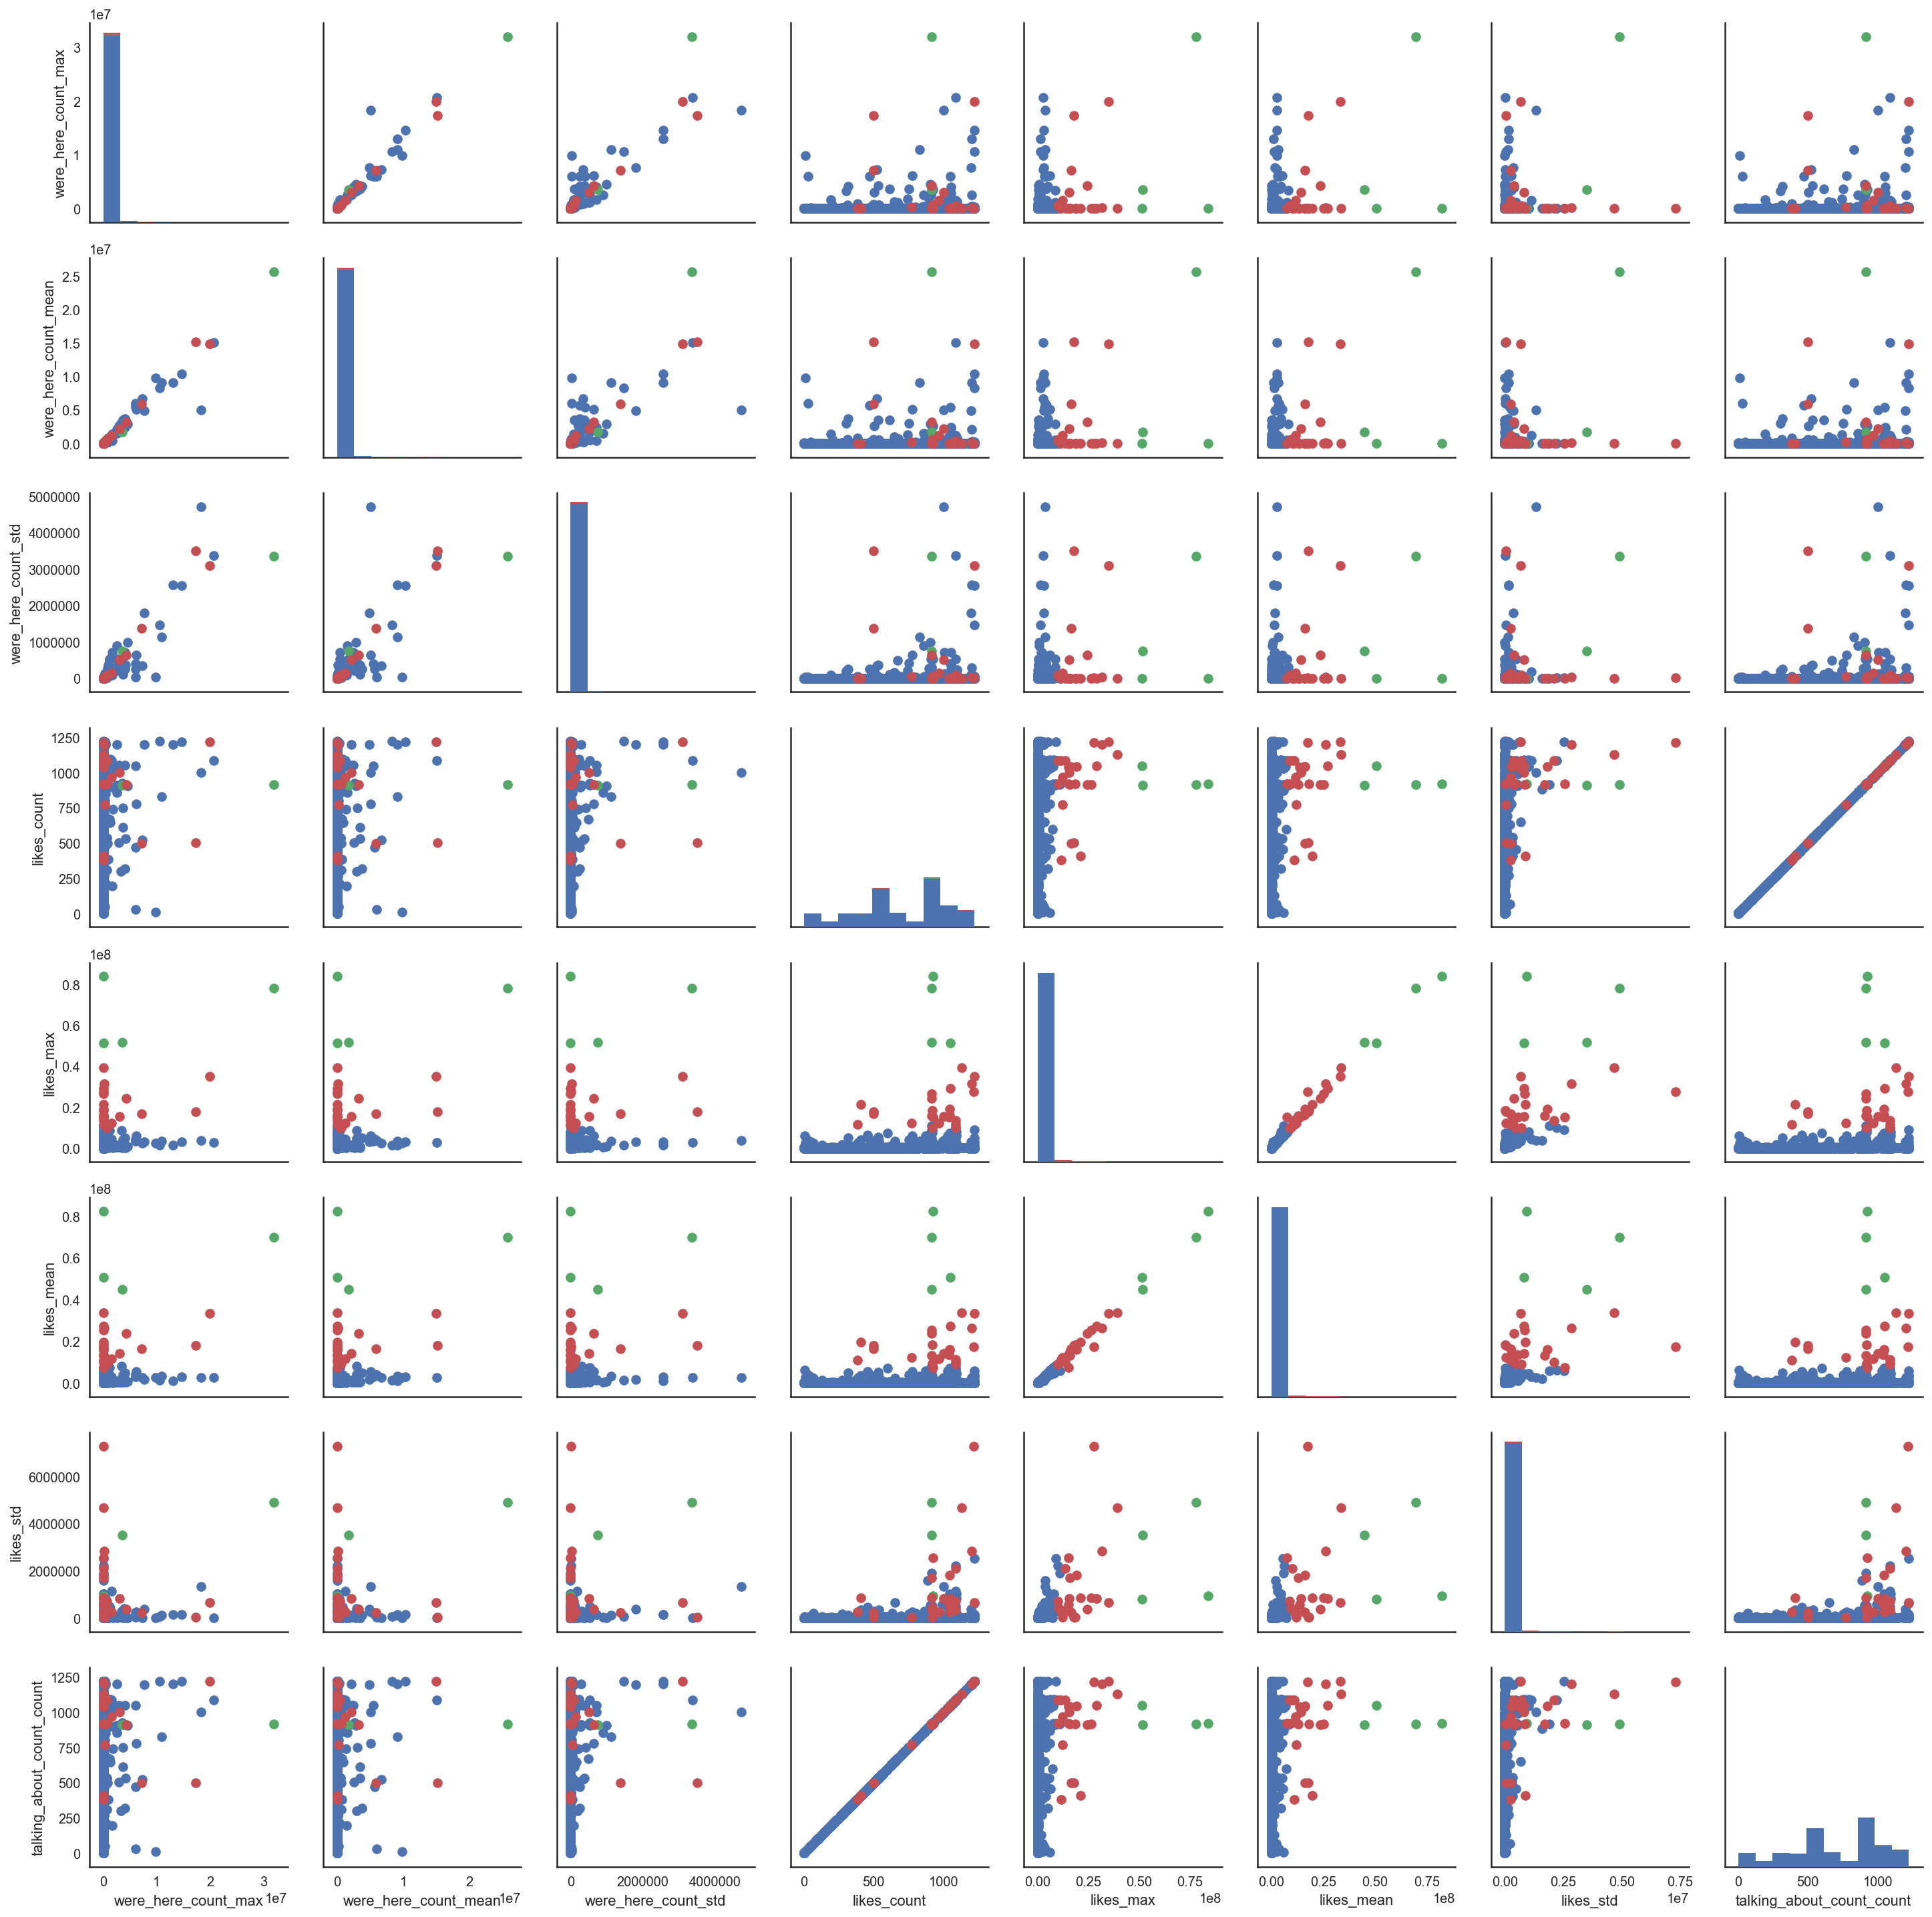

In [280]:
selected_cols = selected_features[8:16]
pg = plot_pair(df_cls, clusters, cols = selected_cols)

In [ ]:
df_cls['cluster'] = clusters

In [ ]:
df_cls['cluster'].value_counts()

In [281]:
good = df_cls['cluster'] == 2
df_cls[good]

checkins_cov  likes_cov  talking_about_count_cov  \
user                                                                
WALMART              0.019229   0.020131                 0.836467   
NIKE                 0.171158   0.108603                 0.861052   
ORANGE               0.565652   0.415874                 2.500893   
WWE                  0.536705   0.138882                 0.379507   
AMERICANEAGLE        0.026309   0.031744                 0.722892   
TIFFANY              0.108152   0.079580                 0.636379   
MICROSOFT            0.015818   0.209303                 1.241185   
AMAZON               0.025452   0.030480                 0.438032   
ESPN                 0.011779   0.113094                 0.362284   
TWITTERINC           0.000000   0.016892                 0.316829   
YAHOO                0.325823   0.041144                 1.008771   
DUNKINDONUTS         0.314297   0.057322                 1.629285   
KOHLS                0.096332   0.022017                 2.538129   
USATODAY             0.018273   0.344093                 0.639778   
GOOGLECHROME         0.000000   0.001634                 0.196684   
OLDNAVY              0.006428   0.045958                 0.701910   
NYTIMES              0.074618   0.130170                 0.387378   
MONSTERENERGY        0.683879   0.033761                 0.411737   
TARGET               0.000000   0.015958                 0.643431   
HOLLISTER            0.016846   0.003136                 0.428505   
DISNEYLAND           0.053309   0.002425                 0.376753   
WALTDISNEYWORLD      0.040952   0.014450                 0.449391   
CHEVROLET            0.000000   0.043847                 0.503805   
PARAMOUNT            0.004157   0.022880                 3.637362   

                 checkins_count  checkins_max  checkins_mean   checkins_std  \
user                                                                          
WALMART                    1220         14428   1.384329e+04     266.187209   
NIKE                       1200         99860   8.674371e+04   14846.871857   
ORANGE                     1214          2499   1.368301e+03     773.981550   
WWE                        1129        214185   1.043400e+05   55999.831854   
AMERICANEAGLE              1087         12711   1.200236e+04     315.768835   
TIFFANY                    1087         18001   1.673688e+04    1810.121580   
MICROSOFT                  1088         73893   7.145106e+04    1130.244206   
AMAZON                     1050          1734   1.650070e+03      41.997943   
ESPN                       1044         22470   2.194843e+04     258.540702   
TWITTERINC                 1042             1   1.000000e+00       0.000000   
YAHOO                      1038         53919   4.121980e+04   13430.368561   
DUNKINDONUTS               1002             3   2.730539e+00       0.858201   
KOHLS                       968         20334   1.672721e+04    1611.371693   
USATODAY                    922          3463   3.365079e+03      61.489997   
GOOGLECHROME                919             2   2.000000e+00       0.000000   
OLDNAVY                     920        103489   1.022466e+05     657.259731   
NYTIMES                     916        171728   1.557112e+05   11618.876784   
MONSTERENERGY               915        200798   1.224249e+05   83723.774575   
TARGET                      914             1   1.000000e+00       0.000000   
HOLLISTER                   772         10067   9.745514e+03     164.168403   
DISNEYLAND                  501      17290550   1.590118e+07  847669.968549   
WALTDISNEYWORLD             500       6547775   6.115426e+06  250438.672757   
CHEVROLET                   409             2   2.000000e+00       0.000000   
PARAMOUNT                   382         65430   6.502827e+04     270.323951   

                 were_here_count_count  were_here_count_max  \
user                                                          
WALMART                           1220   

In [249]:
df_cls['cluster'] = clusters

In [250]:
df_cls['cluster'].value_counts()

0    1928
2      24
1       4
Name: cluster, dtype: int64

In [297]:
selected_features2 = [
       'checkins_cov', 'likes_cov',
       'talking_about_count_cov',
       'checkins_std',
       'were_here_count_std',
       'likes_std',
       'talking_about_count_std', 'checkins_inc',
       'likes_inc', 'talking_about_count_inc']

In [298]:
df_cls2 = df_notime[selected_features2].replace([np.inf, -np.inf], np.nan)

df_cls2.dropna(inplace=True)

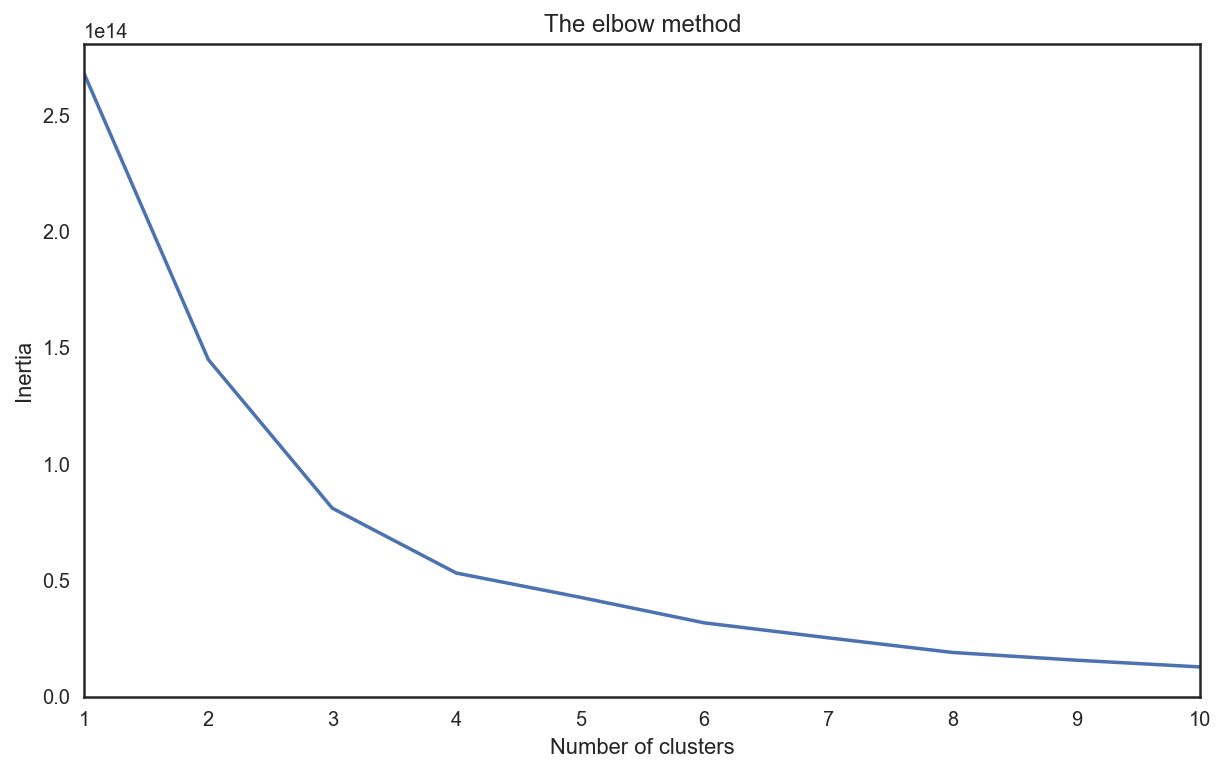

In [299]:
inertia = plot_inertia(df_cls2)

In [300]:
k_means2, clusters2 = cluster(df_cls2, random_state=check_random_state(1), n_clusters=4)

In [301]:
df_cls2['cluster'] = clusters2

In [302]:
df_cls2['cluster'].value_counts()

0    1933
1      13
3       7
2       3
Name: cluster, dtype: int64

/Users/abbypro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


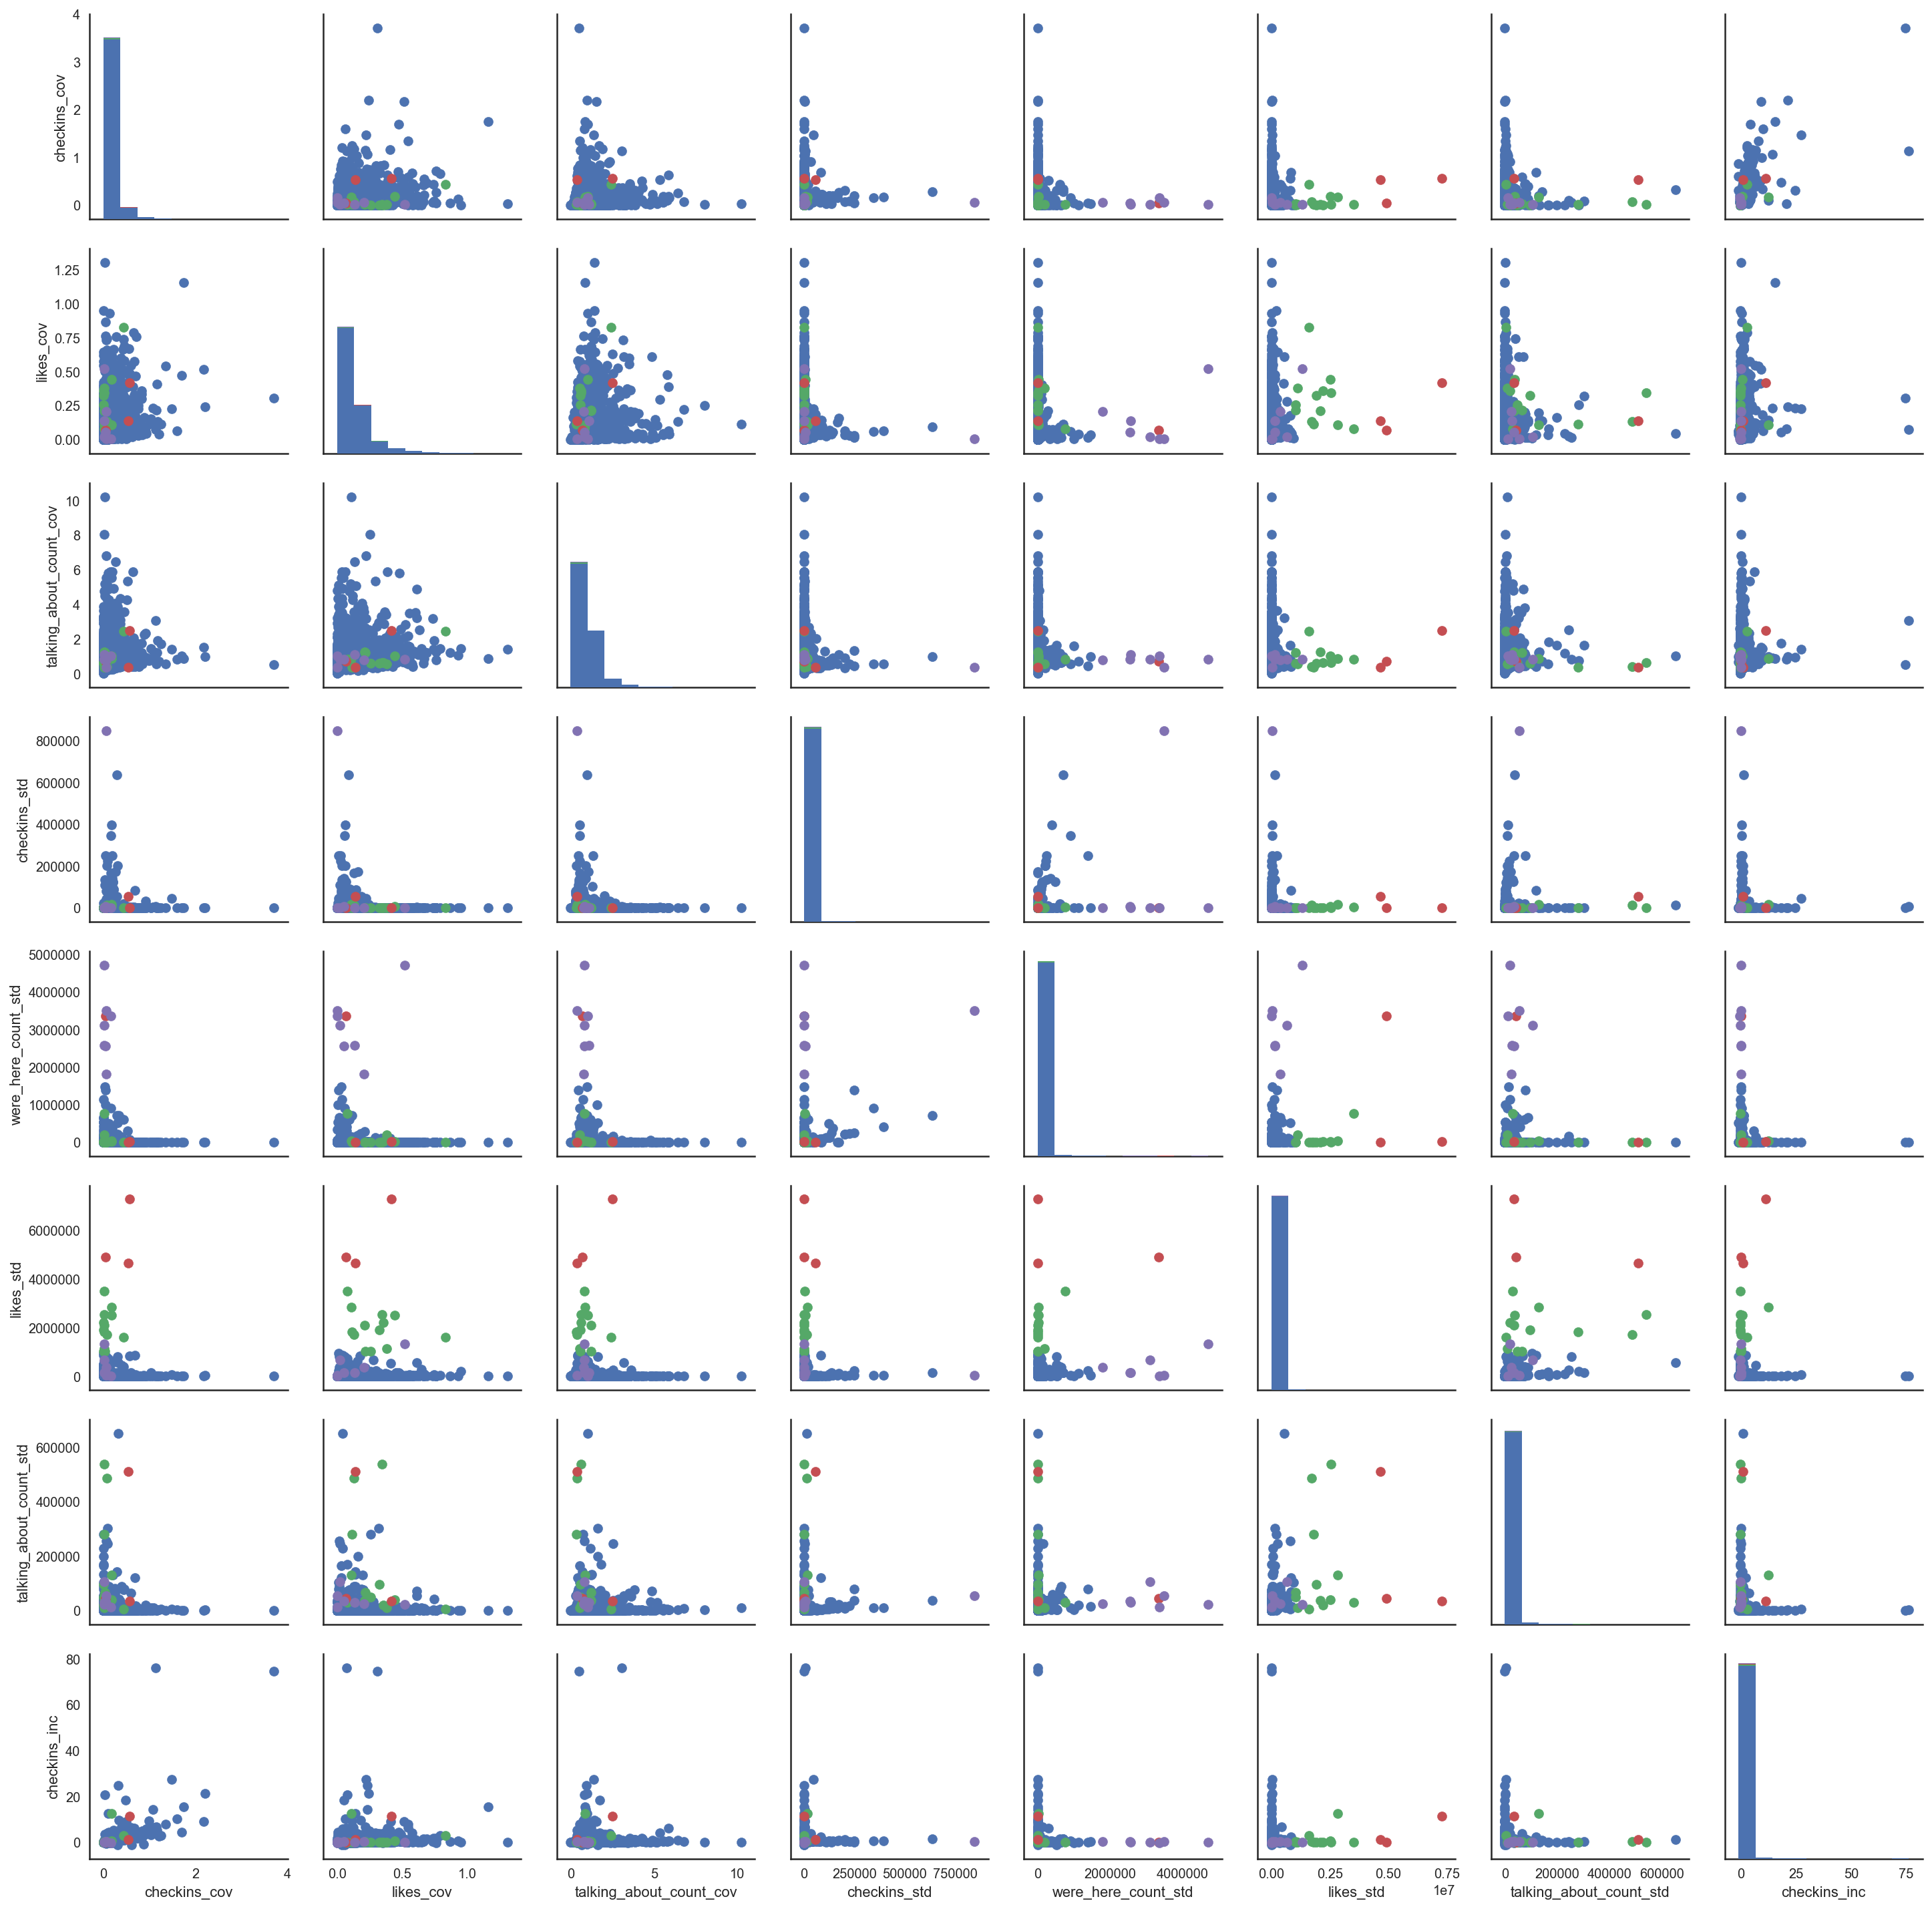

In [303]:
selected_cols = selected_features2[0:8]
pg = plot_pair(df_cls2, clusters2, cols = selected_cols)

In [349]:
good = df_cls2['cluster'] == 1
df_cls[good].reset_index().merge(user_industry)[['industry_short','user']]

industry_short           user
0                                Miscellaneous Retail  LIGHTINTHEBOX
1           Rubber and Miscellaneous Plastic Products           NIKE
2   Engineering, Accounting, Research, and Managem...           FORD
3                                       Not Available    UNDERARMOUR
4                                       Not Available     WHOLEFOODS
5                                   Business Services      MICROSOFT
6                                       Not Available           ESPN
7                                   Business Services    TRIPADVISOR
8                                       Not Available       USATODAY
9                                   Business Services   MERCADOLIBRE
10                                      Not Available        NYTIMES
11                 Wholesale Trade - Nondurable Goods            KFC
12                                      Not Available     CASTROLUSA

In [348]:
good = df_cls2['cluster'] == 2
df_cls[good].reset_index().merge(user_industry)[['industry_short','user']]

industry_short         user
0  Communications       ORANGE
1    Metal Mining          WWE
2   Not Available  MCDONALDSUS

In [347]:
good = df_cls2['cluster'] == 3
df_cls[good].reset_index().merge(user_industry)[['industry_short','user']]

industry_short            user
0                 Food Stores         WALMART
1   Fabricated Metal Products           DELTA
2               Not Available   CRACKERBARREL
3  Eating and Drinking Places          DENNYS
4               Not Available  TEXASROADHOUSE
5               Not Available   PLANETFITNESS
6               Not Available      DISNEYLAND

In [343]:
user_industry = df_notime.reset_index()[['industry_short','user']]

In [345]:
#user_industry

#### DBSCAN

In [261]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
db = DBSCAN(eps=0.5, metric='euclidean', min_samples=10)
db.fit(df_cls[selected_features])

# Get cluster labels and assign plotting colors/labels.
dblbls = set(db.labels_)
dbclrs = sns.hls_palette(len(dblbls))
dbcls = ['Class {0}'.format(idx) if idx >= 0 else 'Noise' for idx in dblbls]

In [263]:
#pc = pd.DataFrame(np.concatenate((x, db.labels_.reshape((150, 1))), axis=1), columns = cols)

In [264]:
df_cls['DB_clusters'] = db.labels_

In [265]:
df_cls['DB_clusters'].value_counts()

-1    1956
Name: DB_clusters, dtype: int64

In [266]:
dblbls

{-1}

### PCA

In [334]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit model to the data
pca.fit(df_cls)

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, selected_cols))
    print(output)

Variance:  Projected dimension
------------------------------
90.4%:     0.00 * checkins_cov +  0.00 * likes_cov +  0.00 * talking_about_count_cov + -0.00 * checkins_std + -0.01 * were_here_count_std + -0.01 * likes_std + -0.00 * talking_about_count_std + -0.00 * checkins_inc
 7.8%:    -0.00 * checkins_cov + -0.00 * likes_cov + -0.00 * talking_about_count_cov +  0.00 * checkins_std +  0.13 * were_here_count_std +  0.12 * likes_std +  0.01 * talking_about_count_std +  0.00 * checkins_inc
 1.1%:    -0.00 * checkins_cov + -0.00 * likes_cov + -0.00 * talking_about_count_cov + -0.00 * checkins_std +  0.72 * were_here_count_std +  0.66 * likes_std +  0.04 * talking_about_count_std + -0.00 * checkins_inc
 0.4%:    -0.00 * checkins_cov + -0.00 * likes_cov + -0.00 * talking_about_count_cov + -0.00 * checkins_std + -0.06 * were_here_count_std + -0.05 * likes_std + -0.01 * talking_about_count_std + -0.00 * checkins_inc
 0.2%:     0.00 * checkins_cov +  0.00 * likes_cov + -0.00 * talking_about_cou

In [311]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df_cls)

In [314]:
pca_reduced = pd.DataFrame(data_reduced)

In [315]:
pca_reduced.columns = ['PC1','PC2']

In [316]:
pca_reduced['user'] = df_cls.index

In [317]:
pca_reduced.shape

(1956, 3)

In [320]:
pca_reduced['cluster'] = clusters2

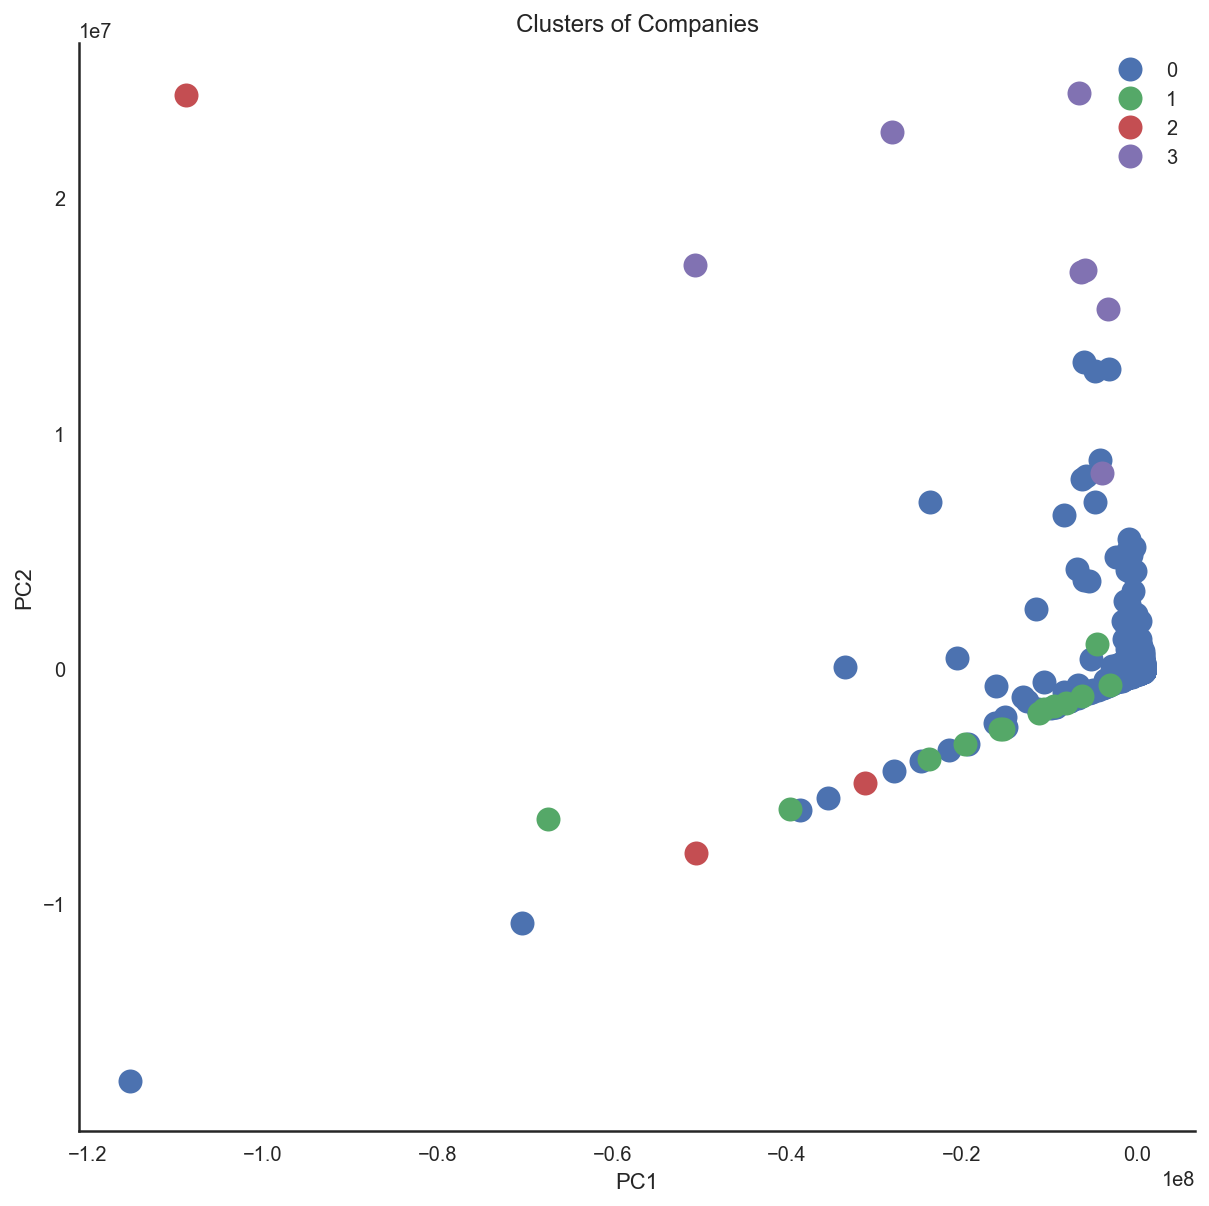

In [332]:
groups = pca_reduced.groupby(['cluster'])

# Plot
fig, ax = plt.subplots(figsize = (10,10))

for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name)

ax.set_title("Clusters of Companies")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")    
ax.legend()
sns.despine()